Notebook to get the number of quarter turns and the time spent aroud a tower for each visit (from first to last QT before leaving the tower)
Has some intersting plotting function to see consecutive turns

Todo: the trajectory are not smoothed and they are simply inverted on the y axis 

In [22]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter as smooth
from matplotlib.patches import Polygon
from typing import Any
plt.style.use('./paper.mplstyle')
import gc
import glob
import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING


We start by a single session

In [24]:
path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'
path_to_data_folder = '/home/david/Documents/David/Data/'
mouse="MOU2334"
session_list=['MOU2334_20240614-1015']
session_folder: str = path_to_data_folder  + mouse + os.sep + session_list[0]
print(session_folder)

mouse_folder = os.path.dirname(session_folder)


/home/david/Documents/David/Data/MOU2334/MOU2334_20240614-1015


In [25]:
mouse_folder
session_list[0]

'MOU2334_20240614-1015'

In [26]:
traj_df, turns_df, param_df=load_data(mouse_folder,session_list[0])

In [27]:
turns_df


time  framenumber  xposition  yposition currentPatch previousTrapeze  \
5     15.316          344        416        216           NE               E   
6     15.955          360        415        340           SE               N   
7     17.595          401        404        424           SE               E   
8     19.277          443        405        410           SE               S   
9     19.998          461        409        334           SE               E   
..       ...          ...        ...        ...          ...             ...   
449  894.107        22040        306        230           NE               W   
450  895.027        22063        308        328           SE               N   
451  896.587        22102        317        425           SE               W   
452  897.190        22117        407        408           SE               S   
453  897.670        22129        421        324           SE               E   

    currentTrapeze  turnDirection ongoingRewardedObject  \
5                S          270.0                ['NE']   
6                E          270.0                ['SE']   
7                S          270.0                ['SE']   
8                E           90.0                ['SE']   
9                N           90.0                ['SE']   
..             ...            ...                   ...   
449              S           90.0                ['NE']   
450              W           90.0                ['SE']   
451              S           90.0                ['SE']   
452              E           90.0                ['SE']   
453              N           90.0                ['SE']   

    ongoingRewardedDirection Rewarded typeOfTurn  nberOfConsecRewards  \
5                    [270.0]        1       gogd                    6   
6                    [270.0]        1       gogd                    7   
7                    [270.0]        1       gogd                    8   
8                    [270.0]    False       gobd                    8   
9                    [270.0]    False       gobd                    8   
..                       ...      ...        ...                  ...   
449                   [90.0]        1       gogd                    9   
450                   [90.0]        1       gogd                   10   
451                   [90.0]        1       gogd                   11   
452                   [90.0]        1       gogd                   12   
453                   [90.0]        0     gogdnr                    0   

     maxNberOfConsecRewards  nbQT_sinceLastReward  nbRewardsWhileDepleting  \
5                         0                     0                        3   
6                         0                     0                        1   
7                         0                     0                        2   
8                         0                     0                        2   
9                         0                     0                        2   
..                      ...                   ...                      ...   
449                       0                     0                        1   
450                       0                     0                        1   
451                       0                     0                        2   
452                       0                     0                        3   
453                       0                     1                        3   

     totalnberOfRewards  
5                     6  
6                     7  
7                     8  
8                     8  
9                     8  
..                  ...  
449                 316  
450                 317  
451                 318  
452                 319  
453                 319  

[449 rows x 17 columns]

In [28]:
traj_df.info

<bound method DataFrame.info of           time  xposition  yposition
336     15.037      430.0      175.0
337     15.076      428.0      180.0
338     15.115      426.0      184.0
339     15.155      424.0      188.0
340     15.195      423.0      194.0
...        ...        ...        ...
22182  899.829      451.0      286.0
22183  899.868      449.0      287.0
22184  899.908      449.0      287.0
22185  899.949      447.0      287.0
22186  899.987      447.0      287.0

[21851 rows x 3 columns]>

In [30]:
# loqd the pickle file with the running epochs and get the info about the each qurter turn in this session
import pickle
session_folder
picklefolderpath=session_folder + '/Pickle_data/'
picklefilename='all_running_epochs.pkl'

# Load data from the pickle file
with open(picklefolderpath+picklefilename, 'rb') as file:
    all_running_epochs = pickle.load(file)


quarter_turns = [epoch for epoch in all_running_epochs if epoch[2][0] == "Q"] # All QT
print(quarter_turns)

[[53, 77, 'QwGSER', np.int64(7)], [94, 111, 'QkBSER', np.int64(8)], [118, 132, 'QkBSER', np.int64(8)], [137, 154, 'QkBSER', np.int64(8)], [292, 309, 'QkGSWR', np.int64(15)], [419, 438, 'QwGSER', np.int64(21)], [452, 467, 'QwGSER', np.int64(22)], [573, 596, 'QkGSWR', np.int64(29)], [604, 620, 'QkDSWR', np.int64(30)], [640, 656, 'QkGSWR', np.int64(30)], [682, 694, 'QkDSWR', np.int64(31)], [750, 765, 'QkGSER', np.int64(34)], [769, 785, 'QkDSER', np.int64(35)], [916, 929, 'QkGNWR', np.int64(36)], [949, 970, 'QkGNWR', np.int64(37)], [984, 1000, 'QkGNWR', np.int64(38)], [1012, 1033, 'QkDNWR', np.int64(39)], [1058, 1082, 'QkGNER', np.int64(40)], [1096, 1110, 'QkGNER', np.int64(41)], [1122, 1138, 'QkGNER', np.int64(42)], [1162, 1181, 'QkGNER', np.int64(43)], [1216, 1232, 'QwGSER', np.int64(45)], [1248, 1268, 'QwGSER', np.int64(46)], [1304, 1317, 'QkGSWR', np.int64(47)], [1328, 1343, 'QkGSWR', np.int64(48)], [1351, 1368, 'QkGSWR', np.int64(49)], [1376, 1392, 'QkDSWR', np.int64(50)], [1467, 1481

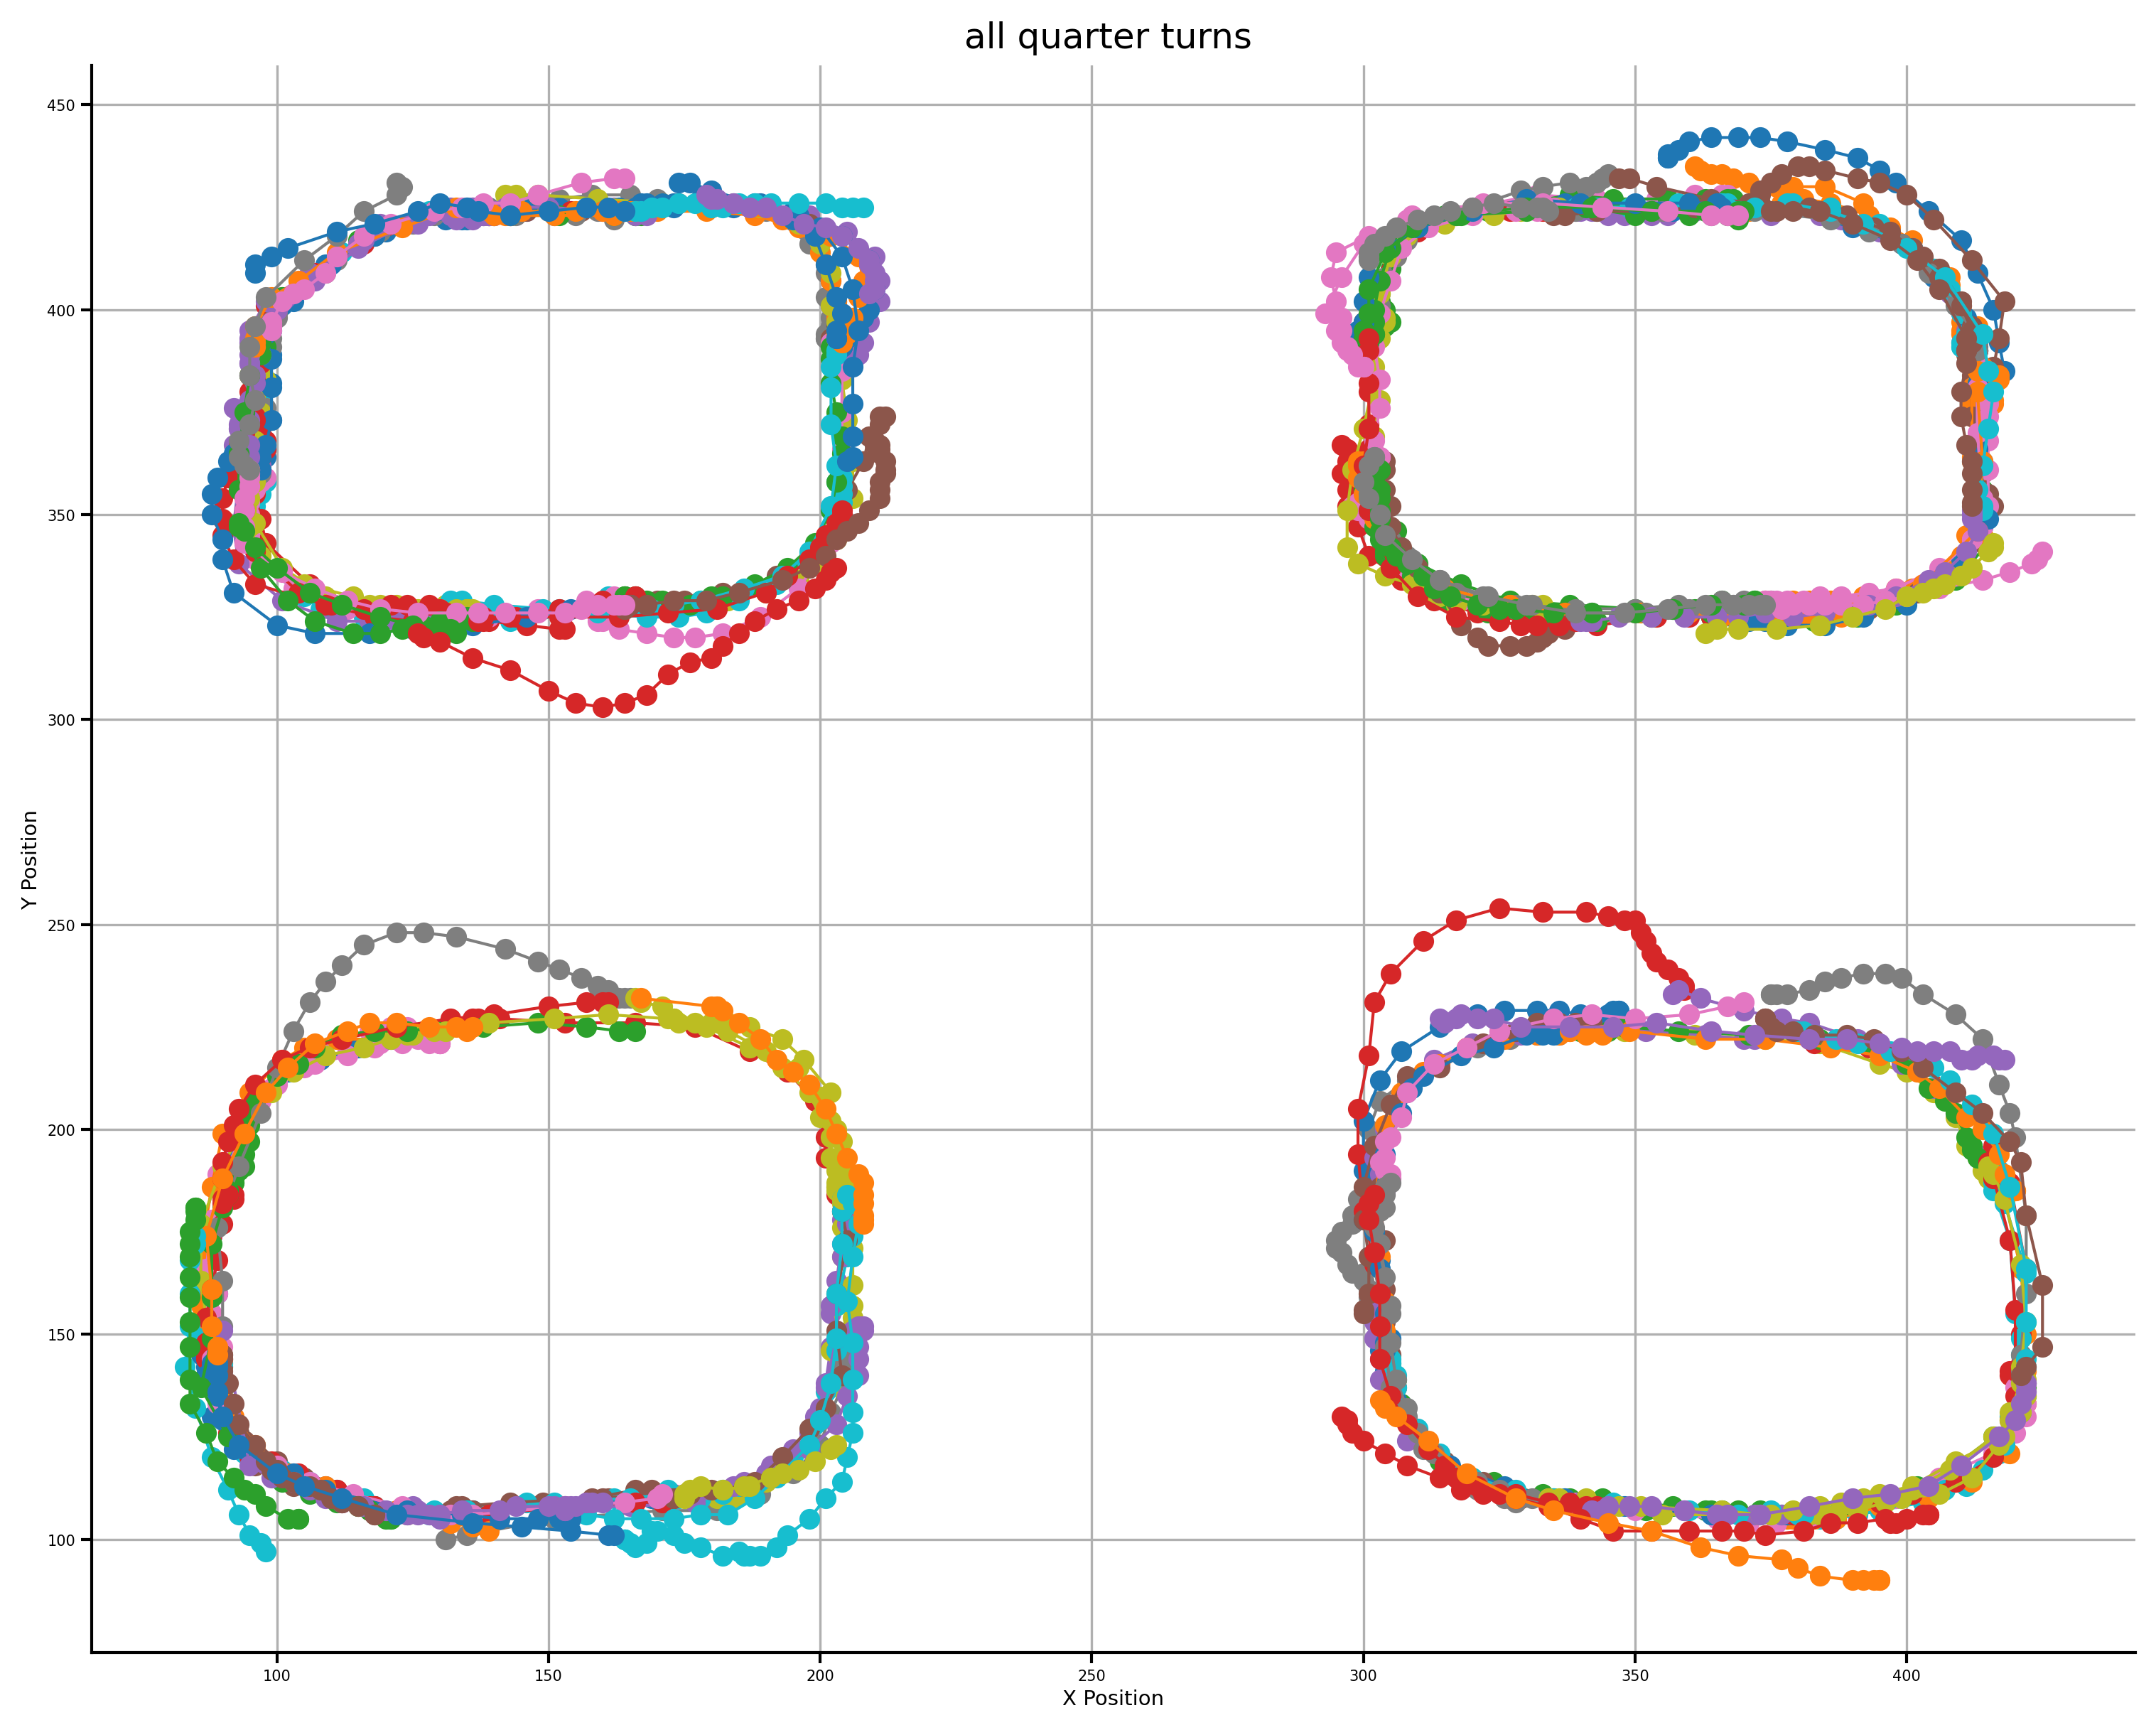

In [31]:
# Function to plot all quarter turns  on the same graph
def plot_all_quarter_turns(traj_df, quarter_turns):
    plt.figure(figsize=(10, 8))
    
    for thisQT in quarter_turns:
        start_index, end_index = thisQT[0], thisQT[1]
        
        # Check if the indexes are within the bounds of traj_df
        if start_index < 0 or end_index >= len(traj_df):
            print(f"Indexes out of bounds for thisQT: {thisQT}")
            continue

        # Extract the quarter_turn segment
        quarter_turn = traj_df.iloc[start_index:end_index + 1]

        # Plot the trajectory
        plt.plot(quarter_turn['xposition'], quarter_turn['yposition'], marker='o', linestyle='-', label=f"Traj {start_index}-{end_index}")

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('all quarter turns ')
    plt.grid(True)
    #plt.legend()
    plt.show()

# Plot all quarter turns 
plot_all_quarter_turns(traj_df, quarter_turns)


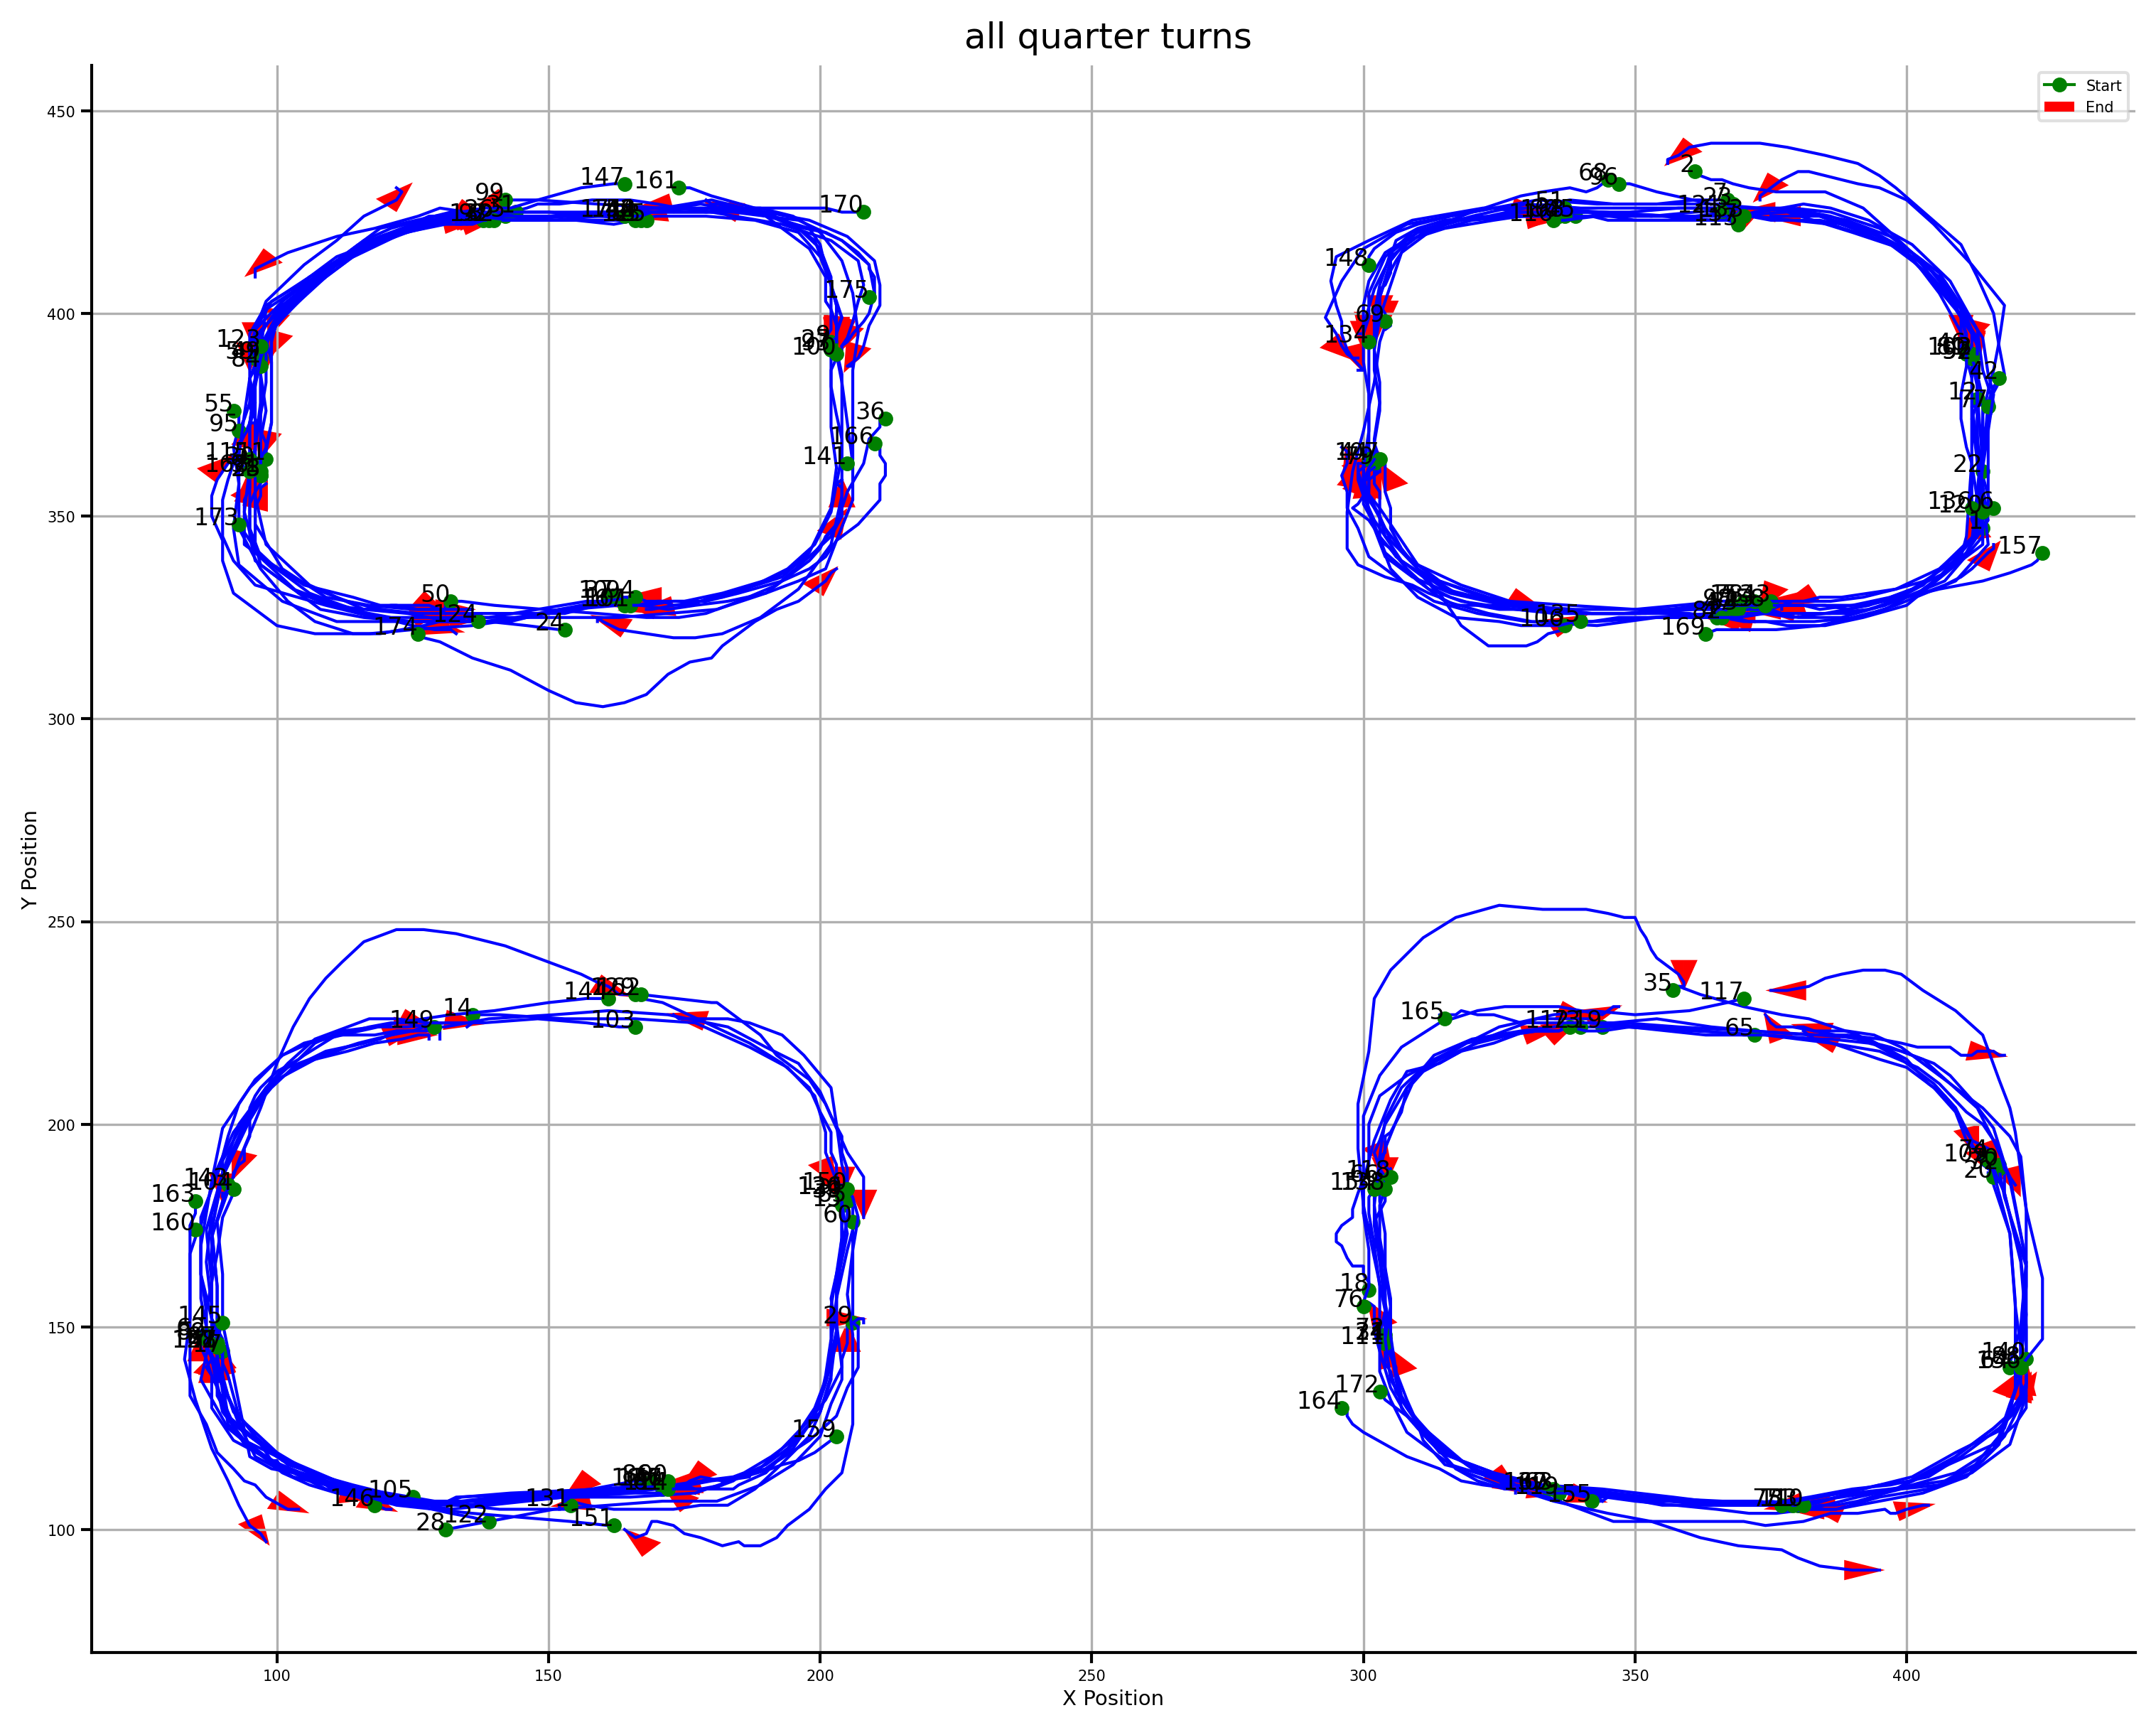

In [33]:
# improved function in wich the beginning and end of the quarter turn is represented with a green dot and red arrow
# and the quarter turn number is also plotted

# Function to compute the average angle direction based on the last few points
def compute_average_direction(points):
    diffs = np.diff(points, axis=0)
    avg_diff = np.mean(diffs, axis=0)
    angle = np.arctan2(avg_diff[1], avg_diff[0])
    return avg_diff, angle

# Function to plot all quarter turns  on the same graph
def plot_all_quarter_turns(traj_df, quarter_turns, points_for_direction=4):
    plt.figure(figsize=(10, 8))
    
    for idx, thisQT in enumerate(quarter_turns):
        start_index, end_index = thisQT[0], thisQT[1]
        
        # Check if the indexes are within the bounds of traj_df
        if start_index < 0 or end_index >= len(traj_df):
            print(f"Indexes out of bounds for thisQT: {thisQT}")
            continue

        # Extract the quarter_turn segment
        quarter_turn = traj_df.iloc[start_index:end_index + 1]

        # Plot the trajectory line
        plt.plot(quarter_turn['xposition'], quarter_turn['yposition'], linestyle='-', color='b')

        # Mark the beginning of the trajectory
        plt.plot(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], 
                 marker='o', color='g', markersize=4, 
                 label='Start' if idx == 0 else "")

        # Compute the average direction based on the last few points
        end_points = quarter_turn[['xposition', 'yposition']].iloc[-points_for_direction:].values
        avg_diff, angle = compute_average_direction(end_points)

        # Draw an arrow at the end of the trajectory
        plt.arrow(
            quarter_turn['xposition'].iloc[-2], quarter_turn['yposition'].iloc[-2], 
            avg_diff[0], avg_diff[1],
            shape='full', lw=0, length_includes_head=True, head_width=5, color='r',
            label='End' if idx == 0 else ""
        )

        # Annotate the number of the quarter turn next to its starting point
        plt.text(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], f'{idx + 1}', fontsize=8, color='black', ha='right')

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('all quarter turns ')
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming you have traj_df and quarter_turns already defined
plot_all_quarter_turns(traj_df, quarter_turns, points_for_direction=4)


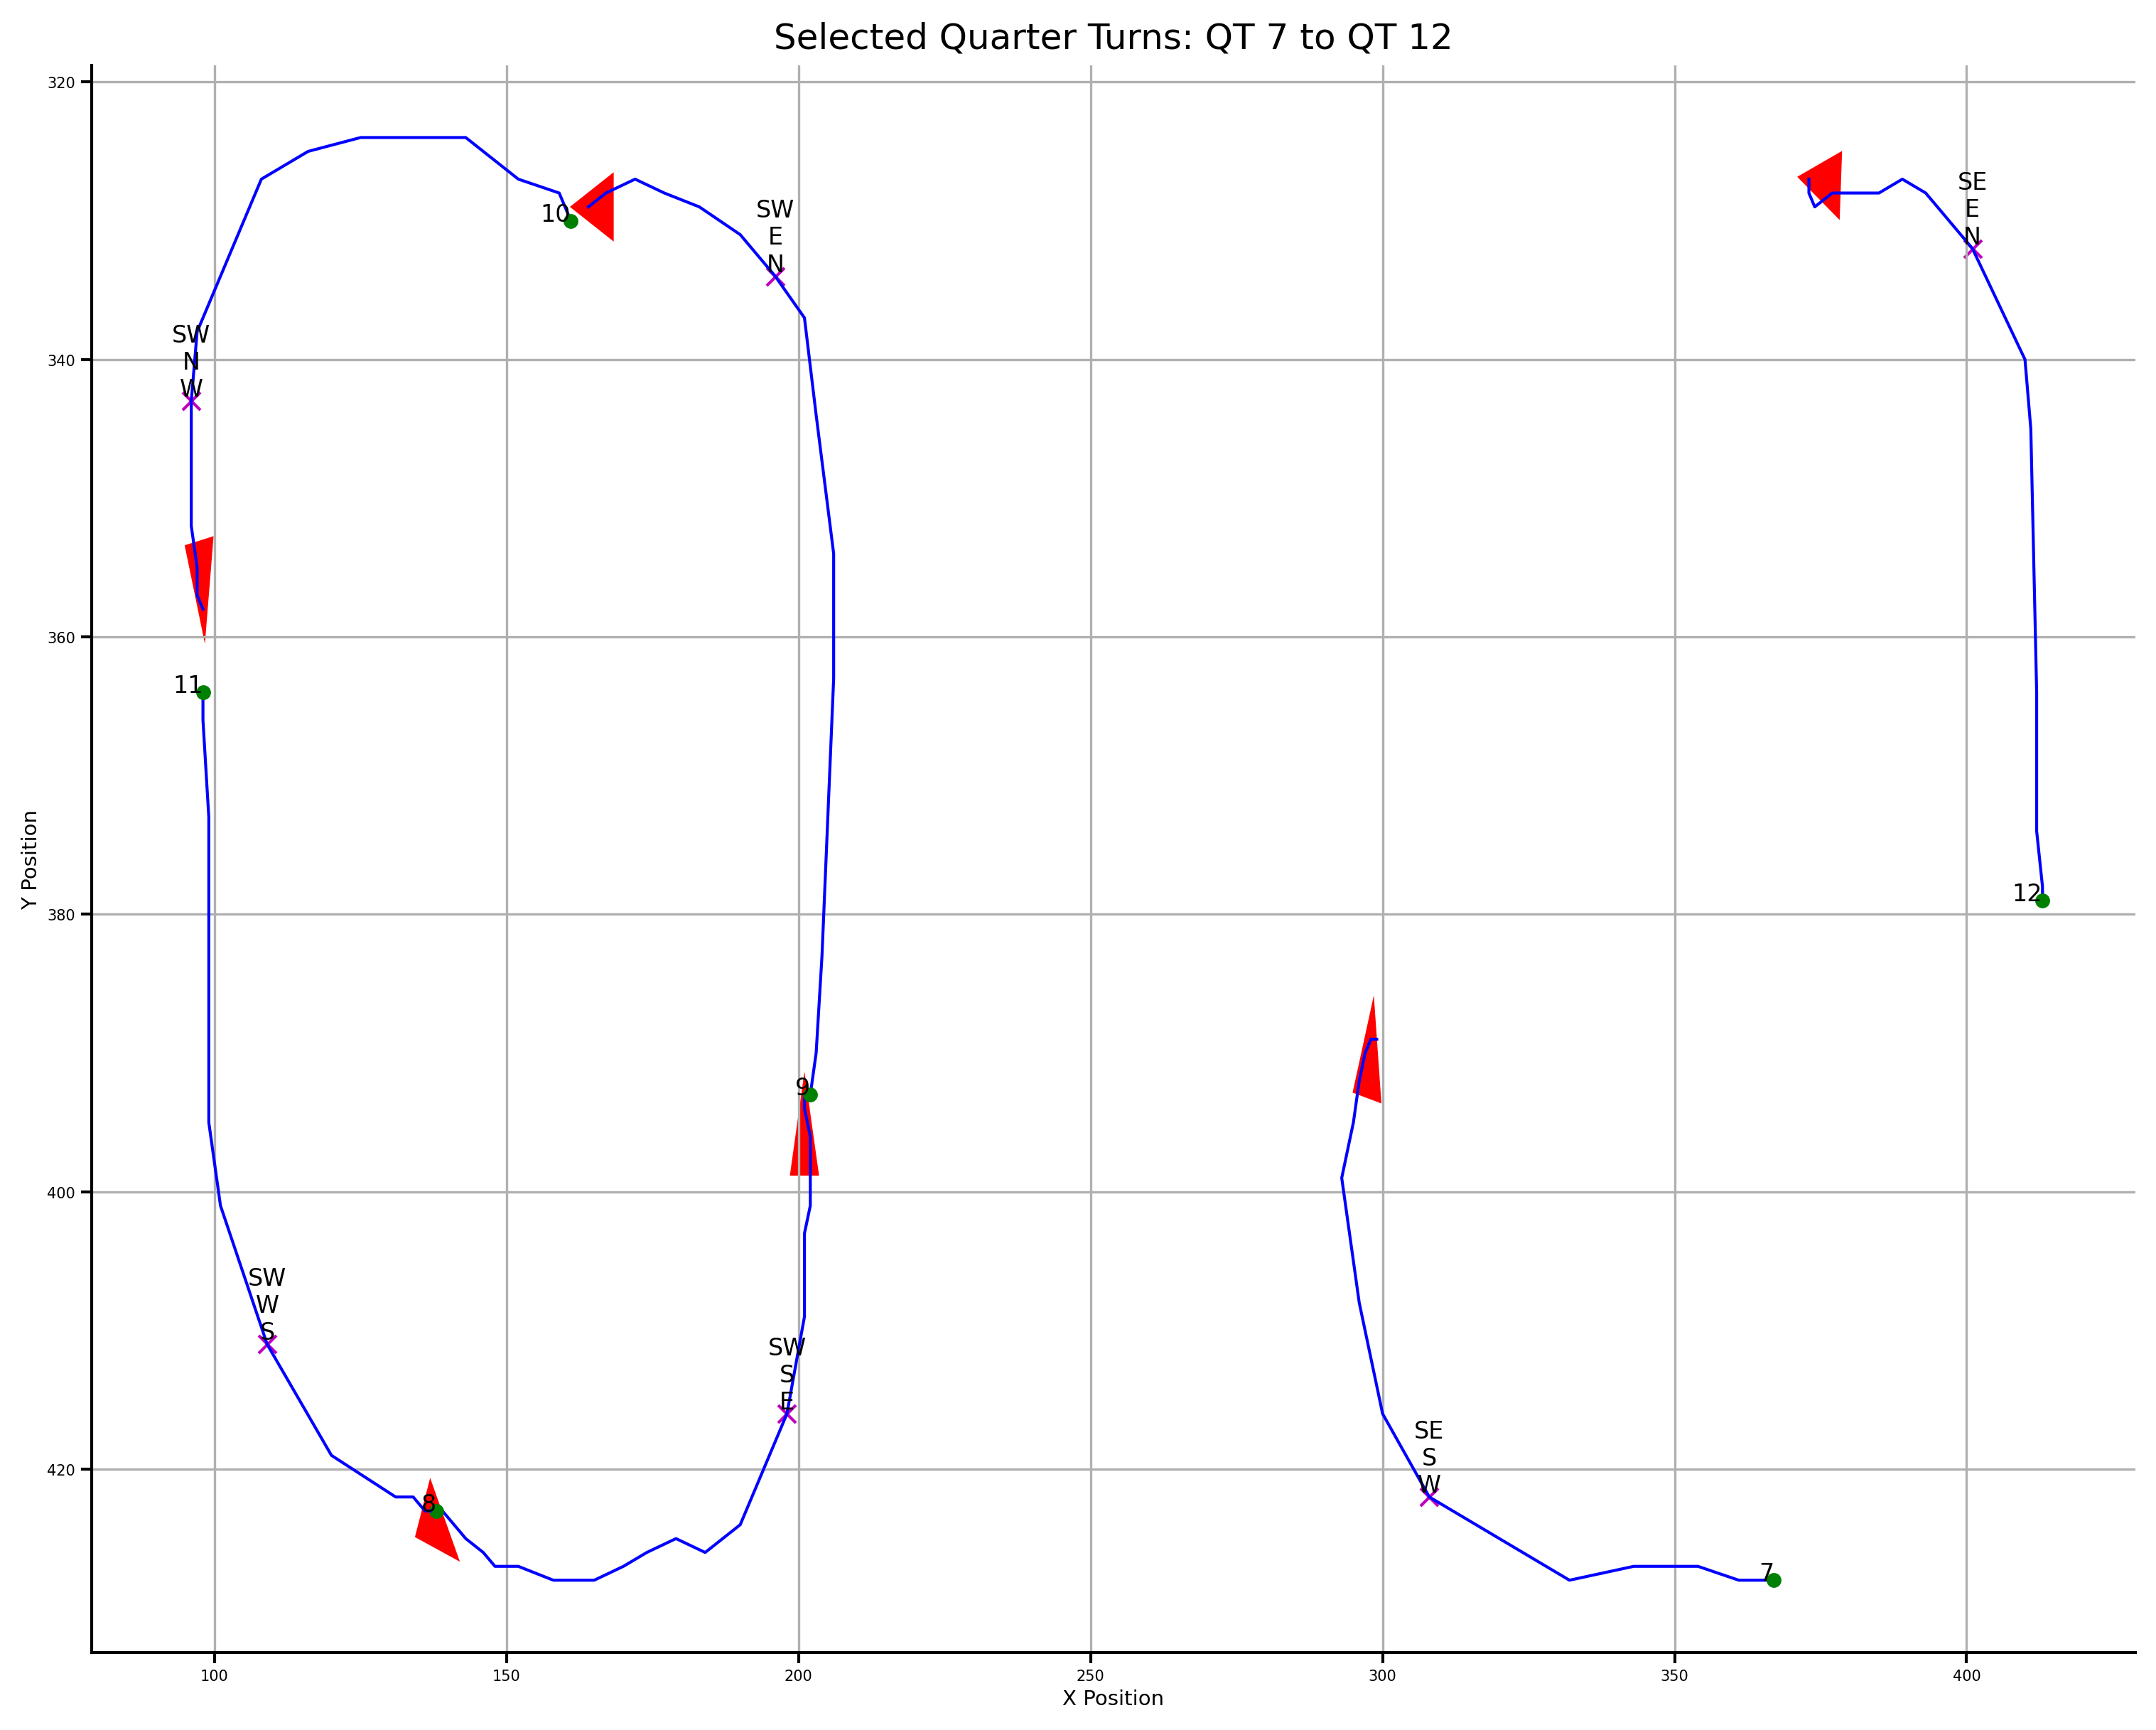

In [37]:
## this function allows to plot only a selected number of quarter turns  
## importantly the function identify for each quarter turn the change of trapze recorded in the turn.csv file (turndf)
## with this info we can associate each full quarter turn trajectory with a tower and a switch from one to another trapeze


# Function to compute the average angle direction based on the last few points
def compute_average_direction(points):
    diffs = np.diff(points, axis=0)
    avg_diff = np.mean(diffs, axis=0)
    angle = np.arctan2(avg_diff[1], avg_diff[0])
    return avg_diff, angle

# Function to plot selected small trajectories on the same graph
def plot_selected_trajectories(traj_df, quarter_turns, turns_df, start_idx, end_idx, points_for_direction=4):
    plt.figure(figsize=(10, 8))

    for idx in range(start_idx, end_idx):
        thisQT = quarter_turns[idx]
        start_index, end_index = thisQT[0], thisQT[1]
        #print(start_index,end_index)

        # Check if the indexes are within the bounds of traj_df
        if start_index < 0 or end_index >= len(traj_df):
            print(f"Indexes out of bounds for thisQT: {thisQT}")
            continue

        # Extract the quarter_turn segment
        quarter_turn = traj_df.iloc[start_index:end_index + 1]

        # Plot the trajectory line
        plt.plot(quarter_turn['xposition'], quarter_turn['yposition'], linestyle='-', color='b')

        # Mark the beginning of the trajectory
        plt.plot(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], 
                 marker='o', color='g', markersize=4, 
                 label='Start' if idx == start_idx else "")

        # Compute the average direction based on the last few points
        end_points = quarter_turn[['xposition', 'yposition']].iloc[-points_for_direction:].values
        avg_diff, angle = compute_average_direction(end_points)

        # Draw an arrow at the end of the trajectory
        plt.arrow(
            quarter_turn['xposition'].iloc[-2], quarter_turn['yposition'].iloc[-2], 
            avg_diff[0], avg_diff[1],
            shape='full', lw=0, length_includes_head=True, head_width=5, color='r',
            label='End' if idx == start_idx else ""
        )

        # Annotate the number of the quarter turn next to its starting point
        plt.text(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], f'{idx + 1}', fontsize=8, color='black', ha='right')

        # Find turn in the turns_df data frame within this quarter turn based on time
        turns_in_QT = turns_df[(turns_df['time'] >= quarter_turn['time'].iloc[0]) & (turns_df['time'] <= quarter_turn['time'].iloc[-1])]
        #print(turns_in_QT)

        # Plot the switch of trapez as a cross marker on the trajectory
        plt.scatter(turns_in_QT['xposition'], turns_in_QT['yposition'], marker='x', color='m', label='Turn Positions')

        # Add labels to turns indicating arrivalTrapeze, departureTrapeze, and currentPatchTower
        for _, turn in turns_in_QT.iterrows():
            plt.text(turn['xposition'], turn['yposition'], f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                     fontsize=8, color='black', ha='center', va='bottom')

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Selected Quarter Turns: QT {start_idx + 1} to QT {end_idx}')
    plt.grid(True)
    #plt.legend()
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()

# Example usage:
# plot quarter turns 1 to 3
plot_selected_trajectories(traj_df, quarter_turns, turns_df, start_idx=6, end_idx=12, points_for_direction=7)


Below we now extract the consecutive quarter tunrs made at each visit as we know if the previous tower visit is the same (increment consecutive QT) or different (save previous visit and reset counters)

## Explanation:

### Initialization and Plotting
- **Create a Plot**: A plot is created using `plt.subplots()`.
- **Loop through Each Quarter Turn**: For each quarter turn in `list_quarter_turn`, the trajectory segments are extracted and plotted.
  - **Annotate Starting Points**: The starting points of the trajectories are annotated.
  - **Draw Direction Arrows**: Direction arrows are drawn to indicate the trajectory direction.
  - **Plot Turn Positions**: Turn positions are plotted on the trajectory.

### Compute Consecutive Quarter Turns
- **Initialize Variables**: Variables are initialized to track the current tower, count, and start time.
- **Loop through Each Quarter Turn**: Each quarter turn is checked for turns within the time range.
  - **Update Count**: The count of consecutive quarter turns is updated based on whether the tower is the same or has changed.
  - **Append Results**: Results are appended to `consecutive_quarter_turns` list when the tower changes.
  - **Append Last Count**: The last tower visit count is appended to the list at the end of the loop.

### Plotting Configuration
- **Set Axis Labels and Title**: Axis labels and title are set for the plot.
- **Configure Grid and Invert Y-Axis**: The grid is enabled, and the y-axis is inverted.
- **Show Plot**: The plot is displayed using `plt.show()`.

### Return Results
- **Return `consecutive_quarter_turns`**: The function returns `consecutive_quarter_turns`, containing the start time, end time, tower label, and number of consecutive quarter turns for each tower visit.

### Example Usage
- **Call the Function**: The function is called to plot all quarter turns and compute the consecutive quarter turns.
- **Print the Results**: The results are printed.

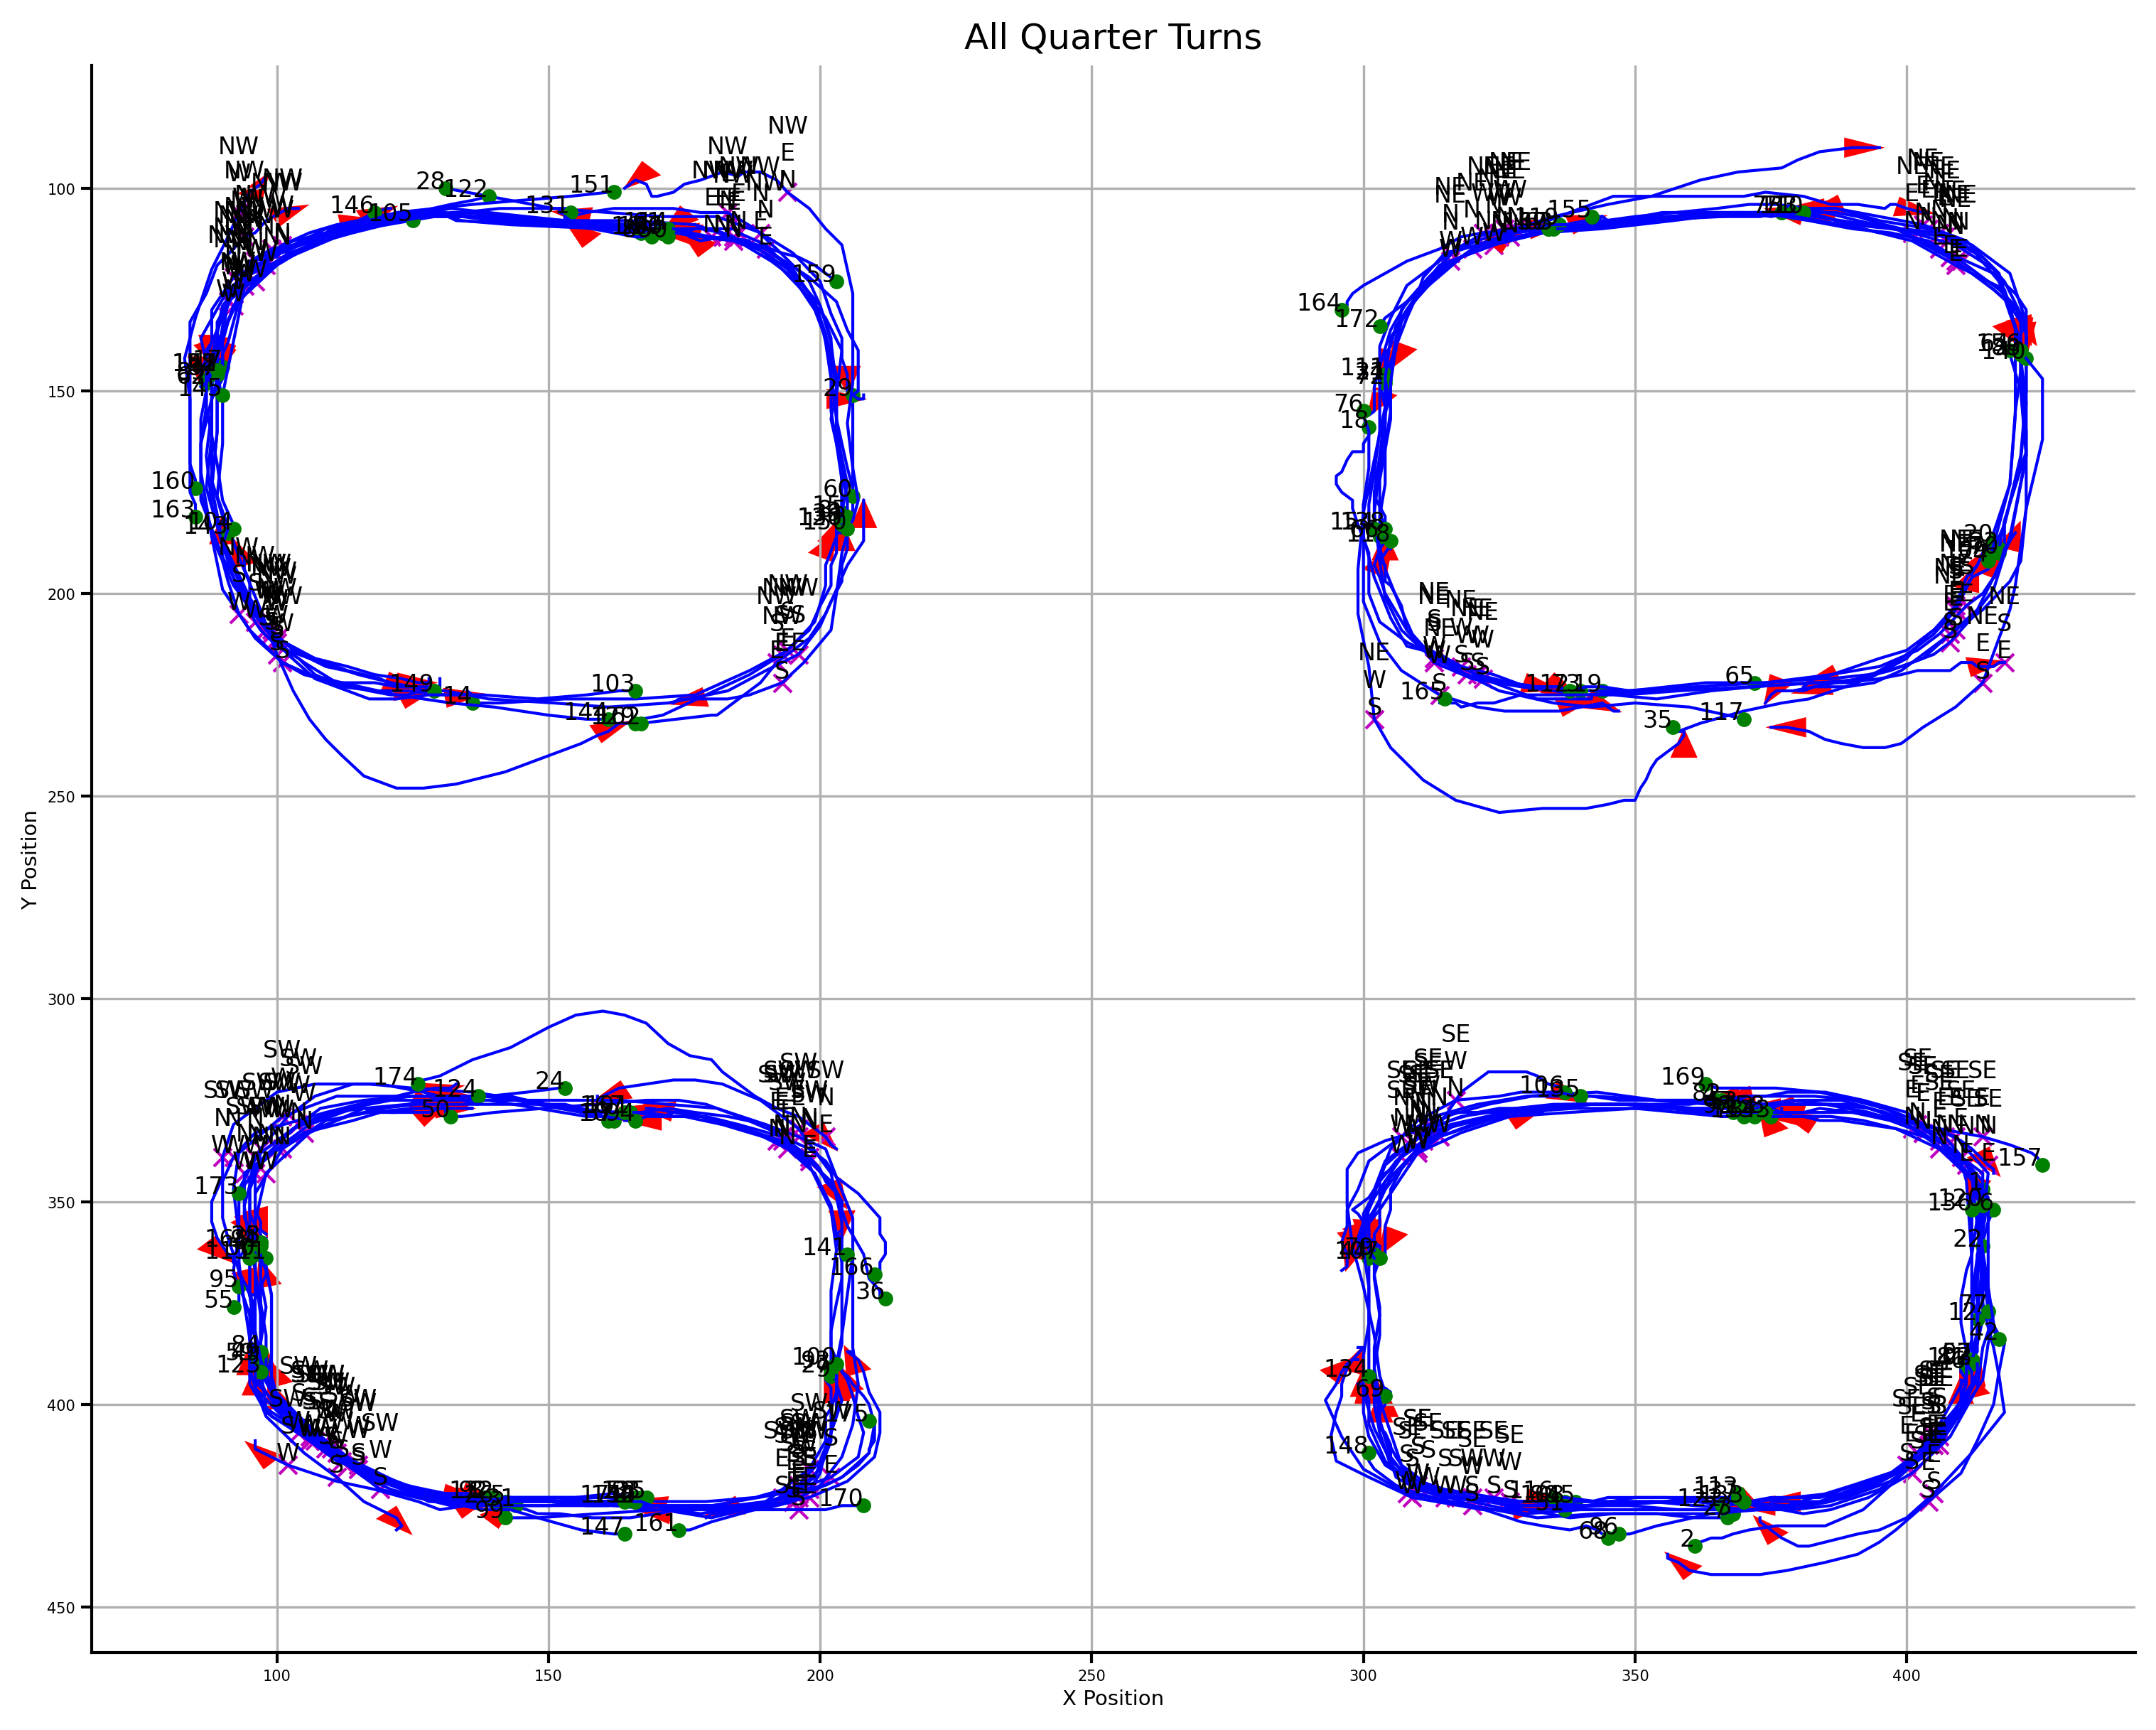

In [41]:


# Function to compute the average angle direction based on the last few points
def compute_average_direction(points):
    diffs = np.diff(points, axis=0)
    avg_diff = np.mean(diffs, axis=0)
    angle = np.arctan2(avg_diff[1], avg_diff[0])
    return avg_diff, angle

# Function to plot all quarter turns  on the same graph and compute consecutive quarter turns
def plot_all_quarter_turns(traj_df, quarter_turns, turns_df, points_for_direction=4):
    fig, ax = plt.subplots(figsize=(10, 8))

    for idx, thisQT in enumerate(quarter_turns):
        start_index, end_index = thisQT[0], thisQT[1]

        # Check if the indexes are within the bounds of traj_df
        if start_index < 0 or end_index >= len(traj_df):
            print(f"Indexes out of bounds for thisQT: {thisQT}")
            continue

        # Extract the quarter_turn segment
        quarter_turn = traj_df.iloc[start_index:end_index + 1]

        # Plot the trajectory line
        ax.plot(quarter_turn['xposition'], quarter_turn['yposition'], linestyle='-', color='b')

        # Mark the beginning of the trajectory
        ax.plot(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], 
                marker='o', color='g', markersize=4, 
                label='Start' if idx == 0 else "")

        # Compute the average direction based on the last few points
        end_points = quarter_turn[['xposition', 'yposition']].iloc[-points_for_direction:].values
        avg_diff, angle = compute_average_direction(end_points)

        # Draw an arrow at the end of the trajectory
        ax.arrow(
            quarter_turn['xposition'].iloc[-2], quarter_turn['yposition'].iloc[-2], 
            avg_diff[0], avg_diff[1],
            shape='full', lw=0, length_includes_head=True, head_width=5, color='r',
            label='End' if idx == 0 else ""
        )

        # Annotate the number of the quarter turn next to its starting point
        ax.text(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], f'{idx + 1}', fontsize=8, color='black', ha='right')

        # Find turns within this quarter turn based on time
        turns_in_QT = turns_df[(turns_df['time'] >= quarter_turn['time'].iloc[0]) & (turns_df['time'] <= quarter_turn['time'].iloc[-1])]

        # Plot turns as markers on the trajectory
        ax.scatter(turns_in_QT['xposition'], turns_in_QT['yposition'], marker='x', color='m', label='Turn Positions')

        # Add labels to turns indicating currentPatch, previousTrapeze, and currentTrapeze
        for _, turn in turns_in_QT.iterrows():
            ax.text(turn['xposition'], turn['yposition'], f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                    fontsize=8, color='black', ha='center', va='bottom')

    # After plotting all quarter turns Compute consecutive quarter turns for each tower visit
    consecutive_quarter_turns = []
    current_tower = None
    current_count = 0
    start_time = None

    for idx, thisQT in enumerate(quarter_turns):
        start_index, end_index = thisQT[0], thisQT[1]
        quarter_turn = traj_df.iloc[start_index:end_index + 1]

        # Find turns in turns_df dataframe within this quarter turn based on time
        turns_in_QT = turns_df[(turns_df['time'] >= quarter_turn['time'].iloc[0]) & (turns_df['time'] <= quarter_turn['time'].iloc[-1])]

        if not turns_in_QT.empty:
            tower = turns_in_QT.iloc[0]['currentPatch']
            if tower == current_tower:
                current_count += 1
            else:
                if current_tower is not None:
                    end_time = traj_df.iloc[quarter_turns[idx - 1][1]]['time']
                    consecutive_quarter_turns.append([start_time, end_time, current_tower, current_count])
                current_tower = tower
                current_count = 1
                start_time = traj_df.iloc[start_index]['time']
        else:
            if current_tower is not None:
                end_time = traj_df.iloc[end_index]['time']
                consecutive_quarter_turns.append([start_time, end_time, current_tower, current_count])
                current_tower = None
                current_count = 0

    # Append the last quarter turn
    if current_tower is not None:
        end_time = traj_df.iloc[quarter_turns[-1][1]]['time']
        consecutive_quarter_turns.append([start_time, end_time, current_tower, current_count])
        

    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title(f'All Quarter Turns')
    ax.grid(True)
    ax.invert_yaxis()  # Invert the y-axis
    #plt.legend()
    plt.show()

    return consecutive_quarter_turns

# Example usage:
# plot all quarter turns
consecutive_quarter_turns = plot_all_quarter_turns(traj_df, quarter_turns, turns_df, points_for_direction=4)

# Print the results
# for visit in consecutive_quarter_turns:
#     print(visit)


## Explanation:

### Compute Average Direction
- **compute_average_direction(points)**: Computes the average direction of the trajectory based on the last few points.

### Plot All Trajectories
- **plot_all_quarter_turns(traj_df, quarter_turns, turns_df, points_for_direction=4)**: Plots all quarter turns and computes the number of consecutive quarter turns before changing towers.

### Additional Plotting
- **Create Bar Plot**: A bar plot is created to show the number of quarter turns performed at each visit over time.
- **Create Histogram**: A histogram is created to show the distribution of the number of quarter turns performed at each visit.


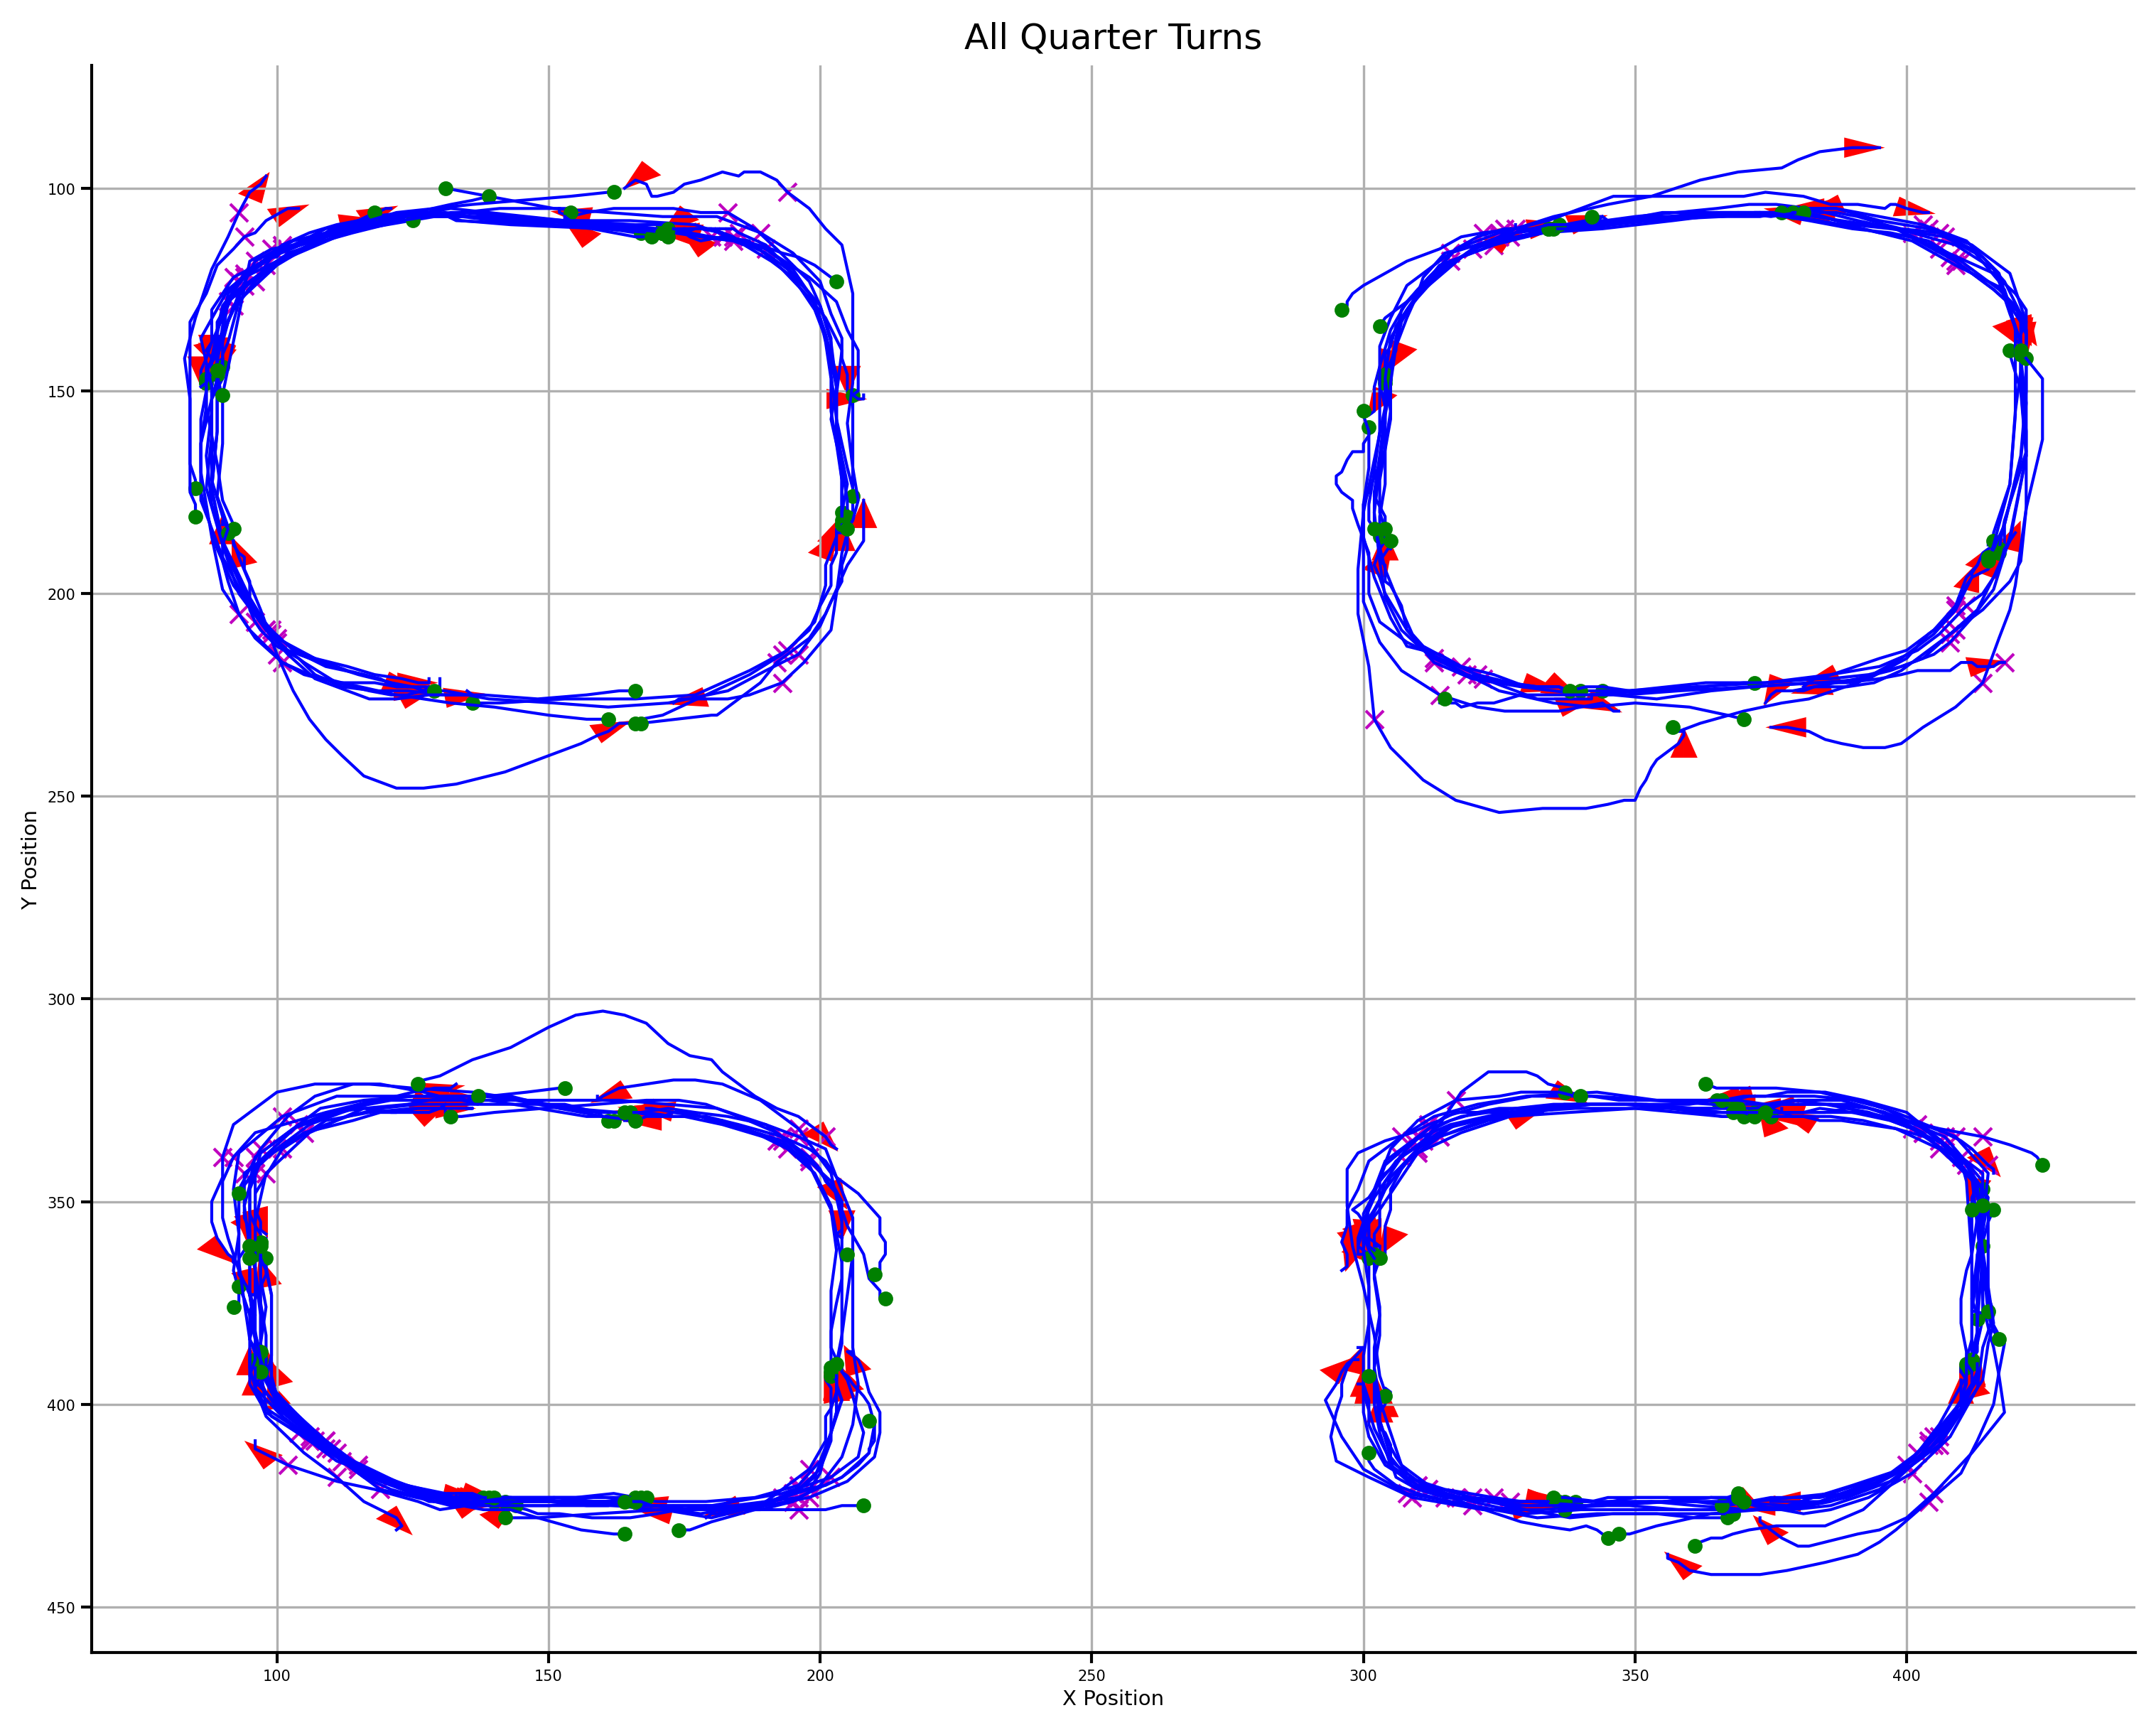

/tmp/ipykernel_98654/572570102.py:82: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


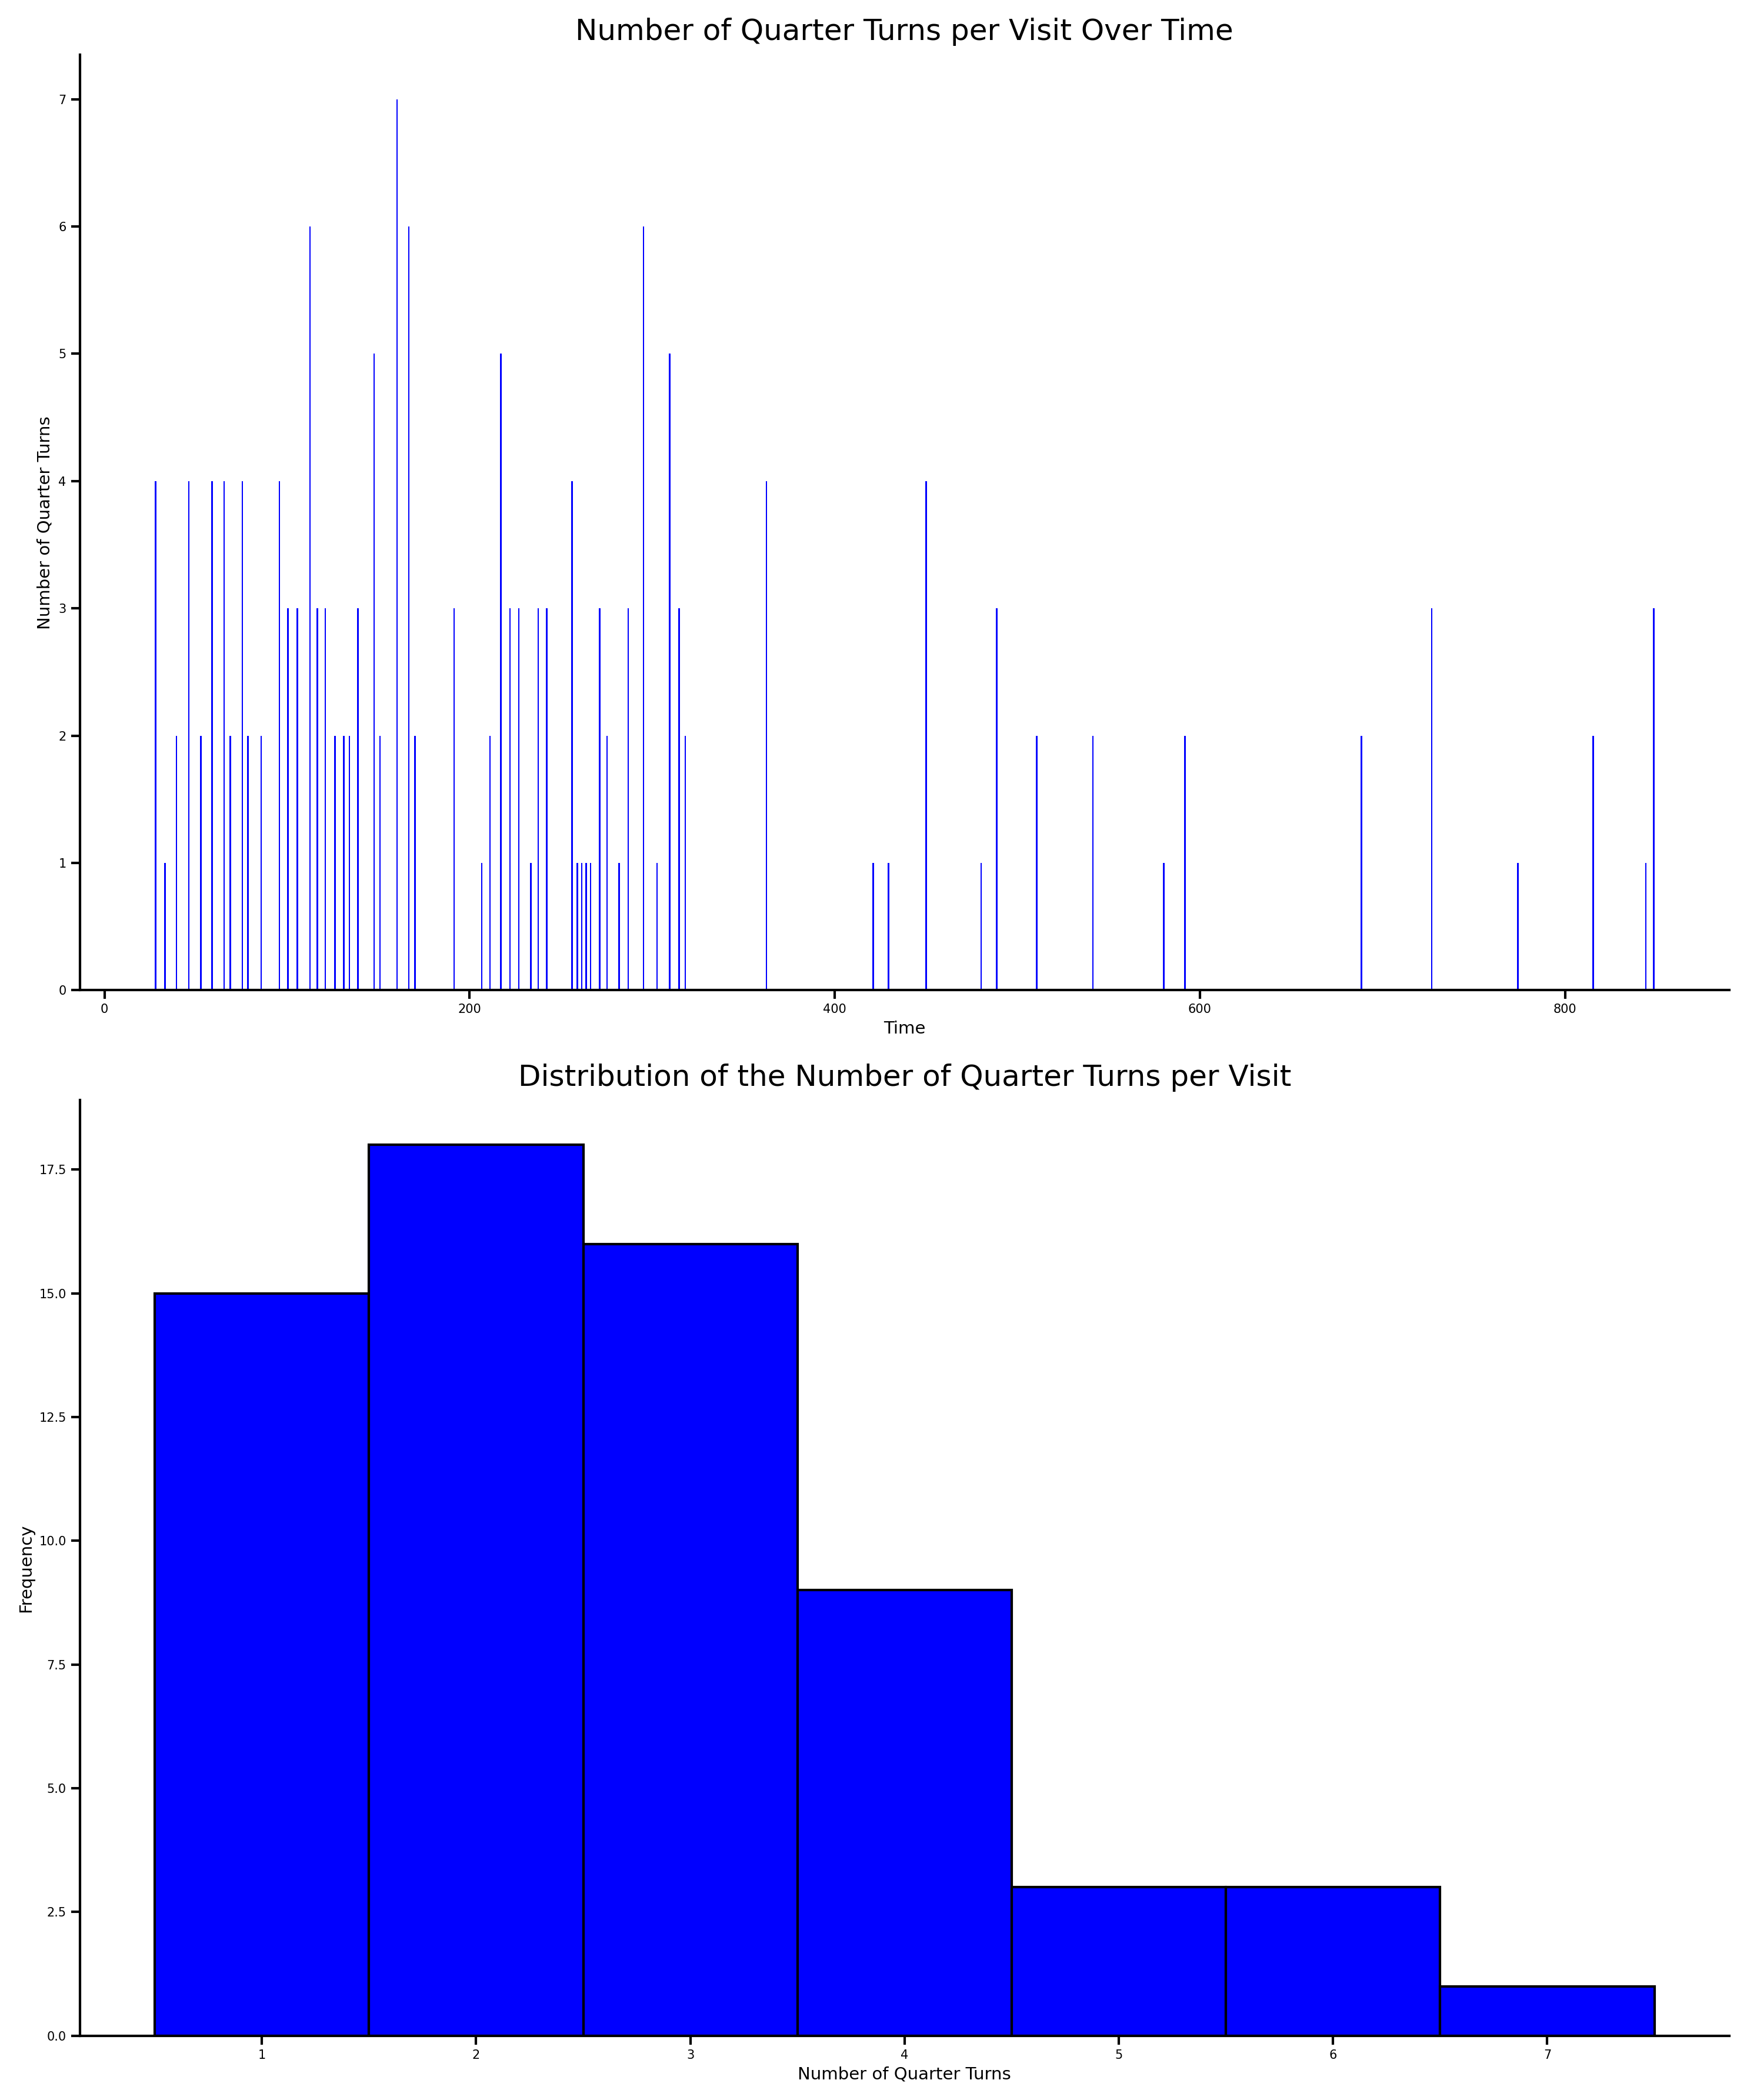

In [42]:


# Function to compute the average angle direction based on the last few points
def compute_average_direction(points):
    diffs = np.diff(points, axis=0)
    avg_diff = np.mean(diffs, axis=0)
    angle = np.arctan2(avg_diff[1], avg_diff[0])
    return avg_diff, angle

# Function to plot all quarter turns  on the same graph and compute consecutive quarter turns
def plot_all_quarter_turns(traj_df, quarter_turns, turns_df, points_for_direction=4):
    fig, ax1 = plt.subplots(figsize=(10, 8))

    consecutive_quarter_turns = []
    current_tower = None
    count = 0
    start_time = None

    for idx, thisQT in enumerate(quarter_turns):
        start_index, end_index = thisQT[0], thisQT[1]

        if start_index < 0 or end_index >= len(traj_df):
            print(f"Indexes out of bounds for thisQT: {thisQT}")
            continue

        quarter_turn = traj_df.iloc[start_index:end_index + 1]
        ax1.plot(quarter_turn['xposition'], quarter_turn['yposition'], linestyle='-', color='b')
        ax1.plot(quarter_turn['xposition'].iloc[0], quarter_turn['yposition'].iloc[0], 
                 marker='o', color='g', markersize=4, label='Start' if idx == 0 else "")
        end_points = quarter_turn[['xposition', 'yposition']].iloc[-points_for_direction:].values
        avg_diff, angle = compute_average_direction(end_points)
        ax1.arrow(quarter_turn['xposition'].iloc[-2], quarter_turn['yposition'].iloc[-2], 
                  avg_diff[0], avg_diff[1], shape='full', lw=0, length_includes_head=True, 
                  head_width=5, color='r', label='End' if idx == 0 else "")
        
        turns_in_QT = turns_df[(turns_df['time'] >= quarter_turn['time'].iloc[0]) & (turns_df['time'] <= quarter_turn['time'].iloc[-1])]
        
        for _, turn in turns_in_QT.iterrows():
            ax1.scatter(turn['xposition'], turn['yposition'], marker='x', color='m', label='Turn Positions')
        
        if not turns_in_QT.empty:
            current_patch = turns_in_QT.iloc[0]['currentPatch']
            if current_patch != current_tower:
                if current_tower is not None:
                    consecutive_quarter_turns.append([start_time, quarter_turn['time'].iloc[-1], current_tower, count])
                current_tower = current_patch
                start_time = quarter_turn['time'].iloc[0]
                count = 1
            else:
                count += 1

    if current_tower is not None:
        consecutive_quarter_turns.append([start_time, quarter_turn['time'].iloc[-1], current_tower, count])

    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_title('All Quarter Turns')
    ax1.grid(True)
    ax1.invert_yaxis()
    plt.show()

    return consecutive_quarter_turns

# Example usage:
consecutive_quarter_turns = plot_all_quarter_turns(traj_df, quarter_turns, turns_df, points_for_direction=4)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the number of quarter turns per visit over time
end_times = [entry[1] for entry in consecutive_quarter_turns]
num_turns = [entry[3] for entry in consecutive_quarter_turns]
ax1.bar(end_times, num_turns, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Quarter Turns')
ax1.set_title('Number of Quarter Turns per Visit Over Time')

# Plot the distribution of the number of quarter turns performed at each visit
ax2.hist(num_turns, bins=np.arange(1, max(num_turns)+2) - 0.5, edgecolor='black', color='blue')
ax2.set_xlabel('Number of Quarter Turns')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of the Number of Quarter Turns per Visit')

plt.tight_layout()
plt.show()


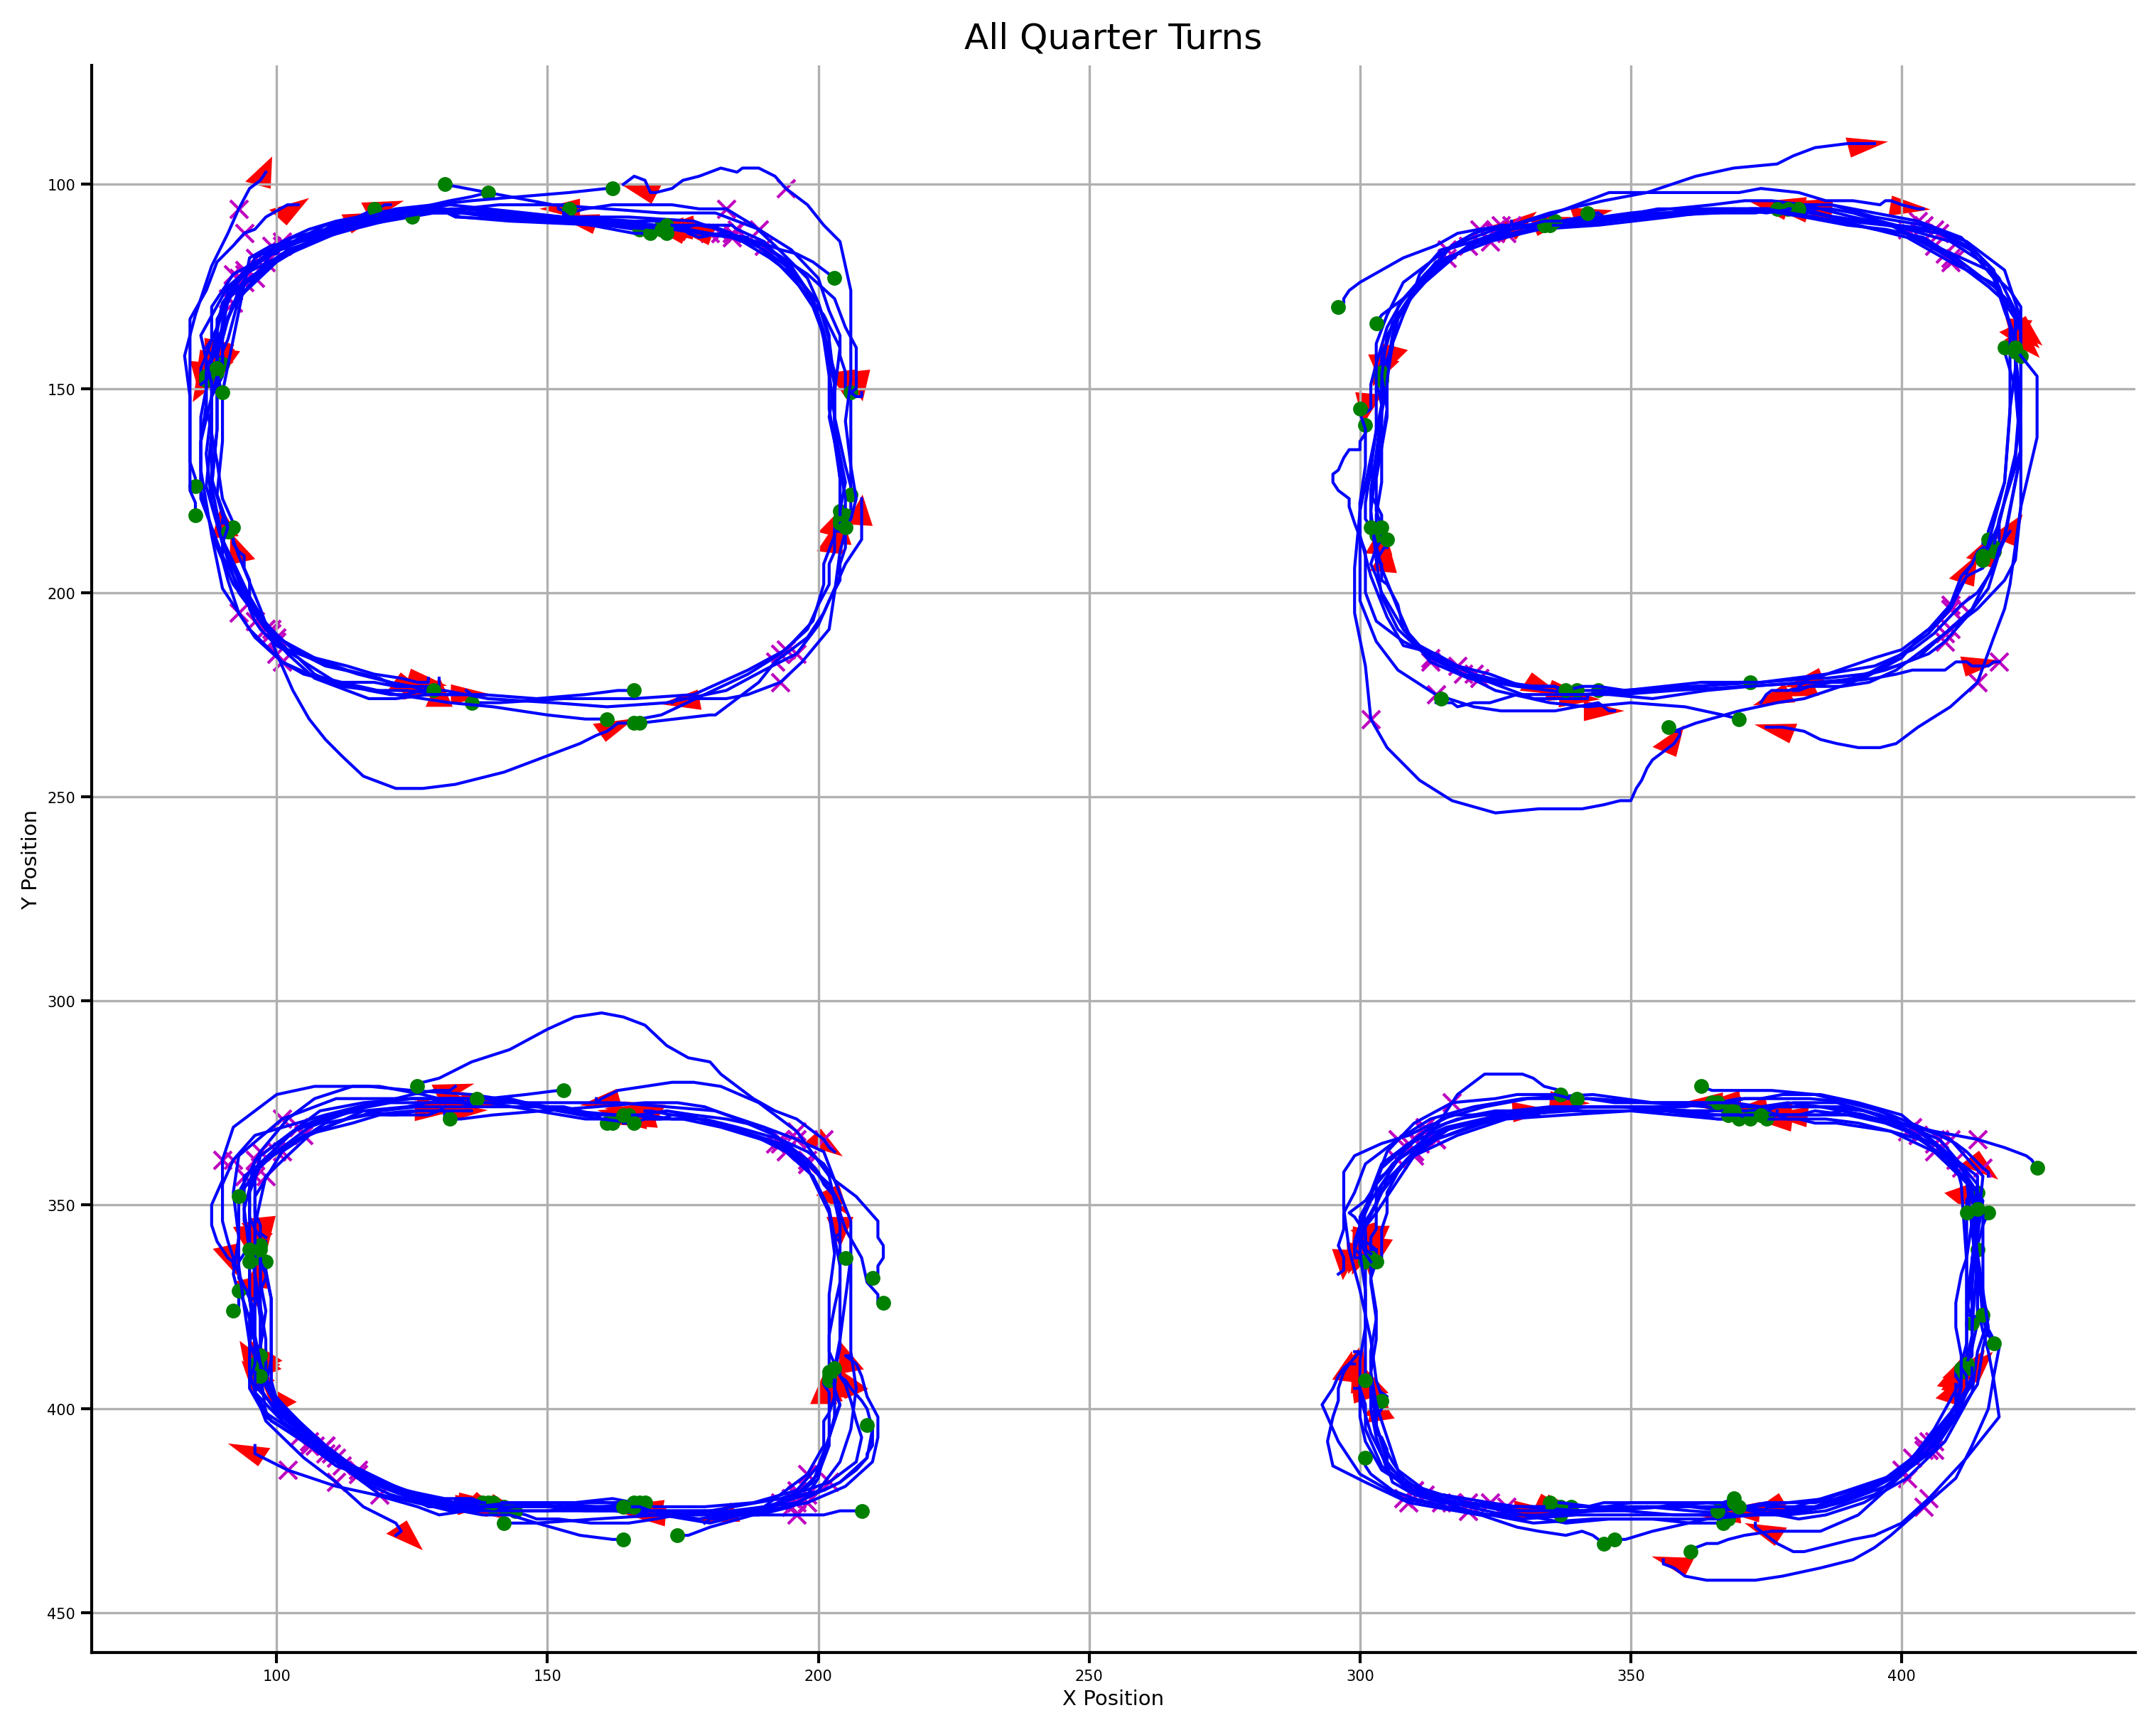

Median number of consecutive quarter turns per visit: 2.0
Median time spent at each tower (in seconds): 7.084000000000003


/tmp/ipykernel_98654/3884889926.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


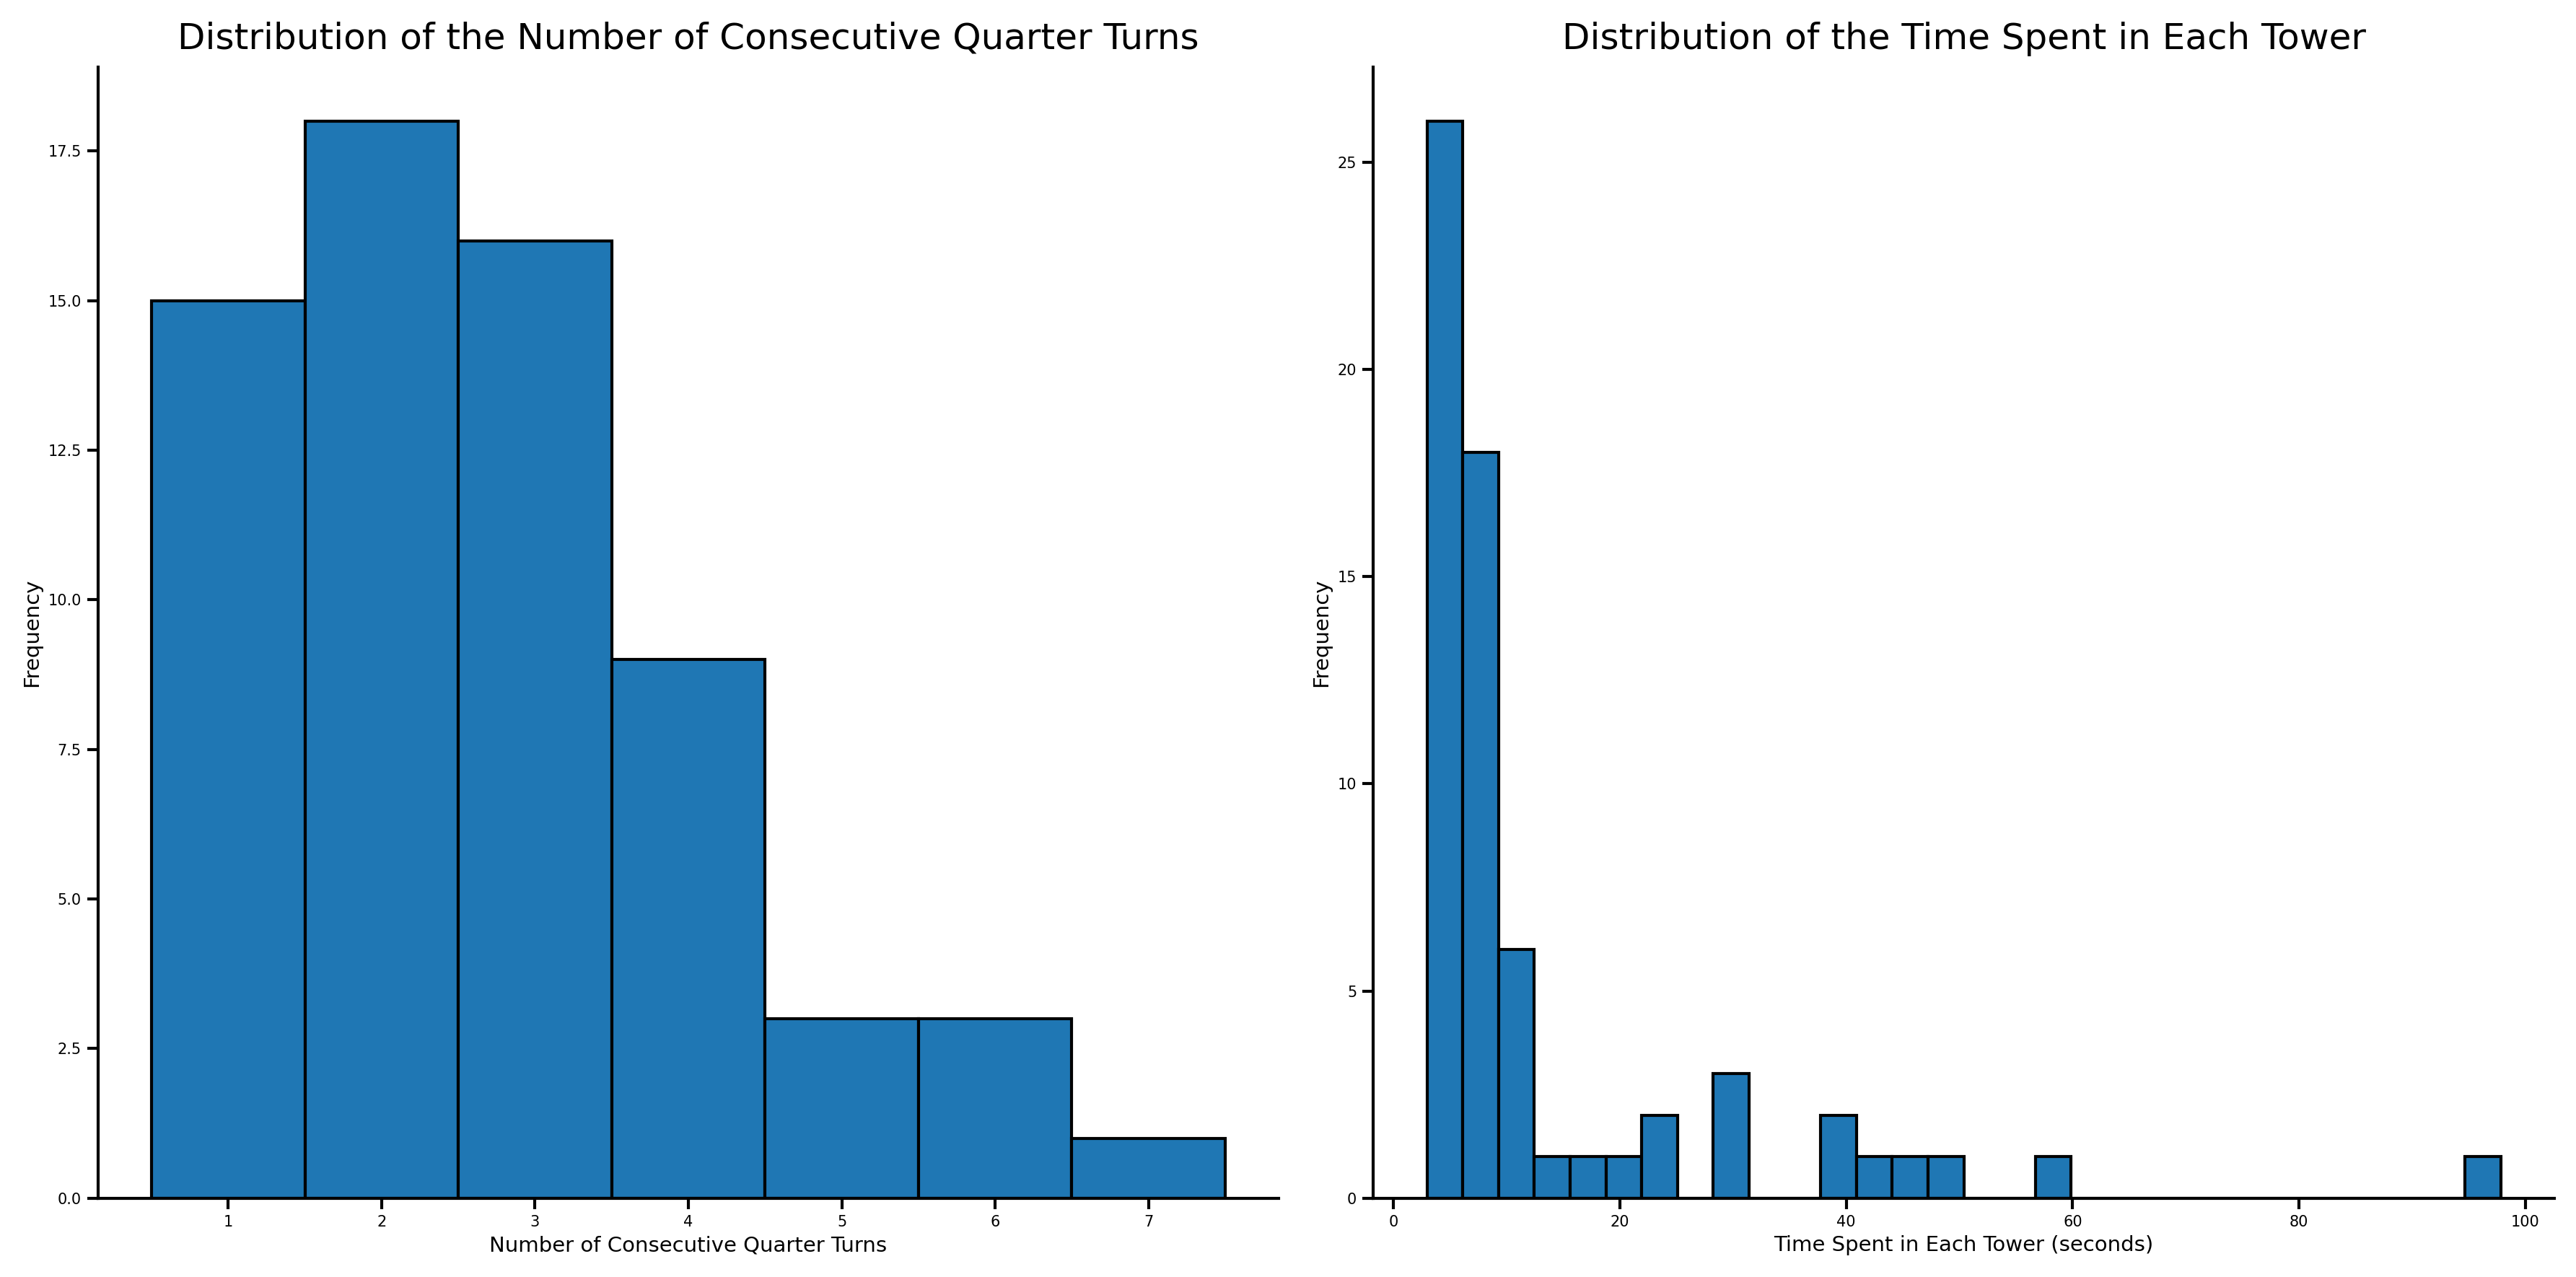

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Example usage:
consecutive_quarter_turns = plot_all_quarter_turns(traj_df, quarter_turns, turns_df, points_for_direction=7)

# Extract the number of quarter turns and the time spent for each visit
num_turns = [entry[3] for entry in consecutive_quarter_turns]
time_spent = [entry[1] - entry[0] for entry in consecutive_quarter_turns]

# Calculate the median of the number of quarter turns
median_num_turns = np.median(num_turns)
print("Median number of consecutive quarter turns per visit:", median_num_turns)

# Calculate the median time spent at each tower
median_time_spent = np.median(time_spent)
print("Median time spent at each tower (in seconds):", median_time_spent)

# Plot the distribution of the number of quarter turns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(num_turns, bins=range(1, max(num_turns)+2), align='left', edgecolor='black')
plt.xlabel('Number of Consecutive Quarter Turns')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Consecutive Quarter Turns')

plt.subplot(1, 2, 2)
plt.hist(time_spent, bins=30, edgecolor='black')
plt.xlabel('Time Spent in Each Tower (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of the Time Spent in Each Tower')

plt.tight_layout()
plt.show()


/tmp/ipykernel_98654/1838694505.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


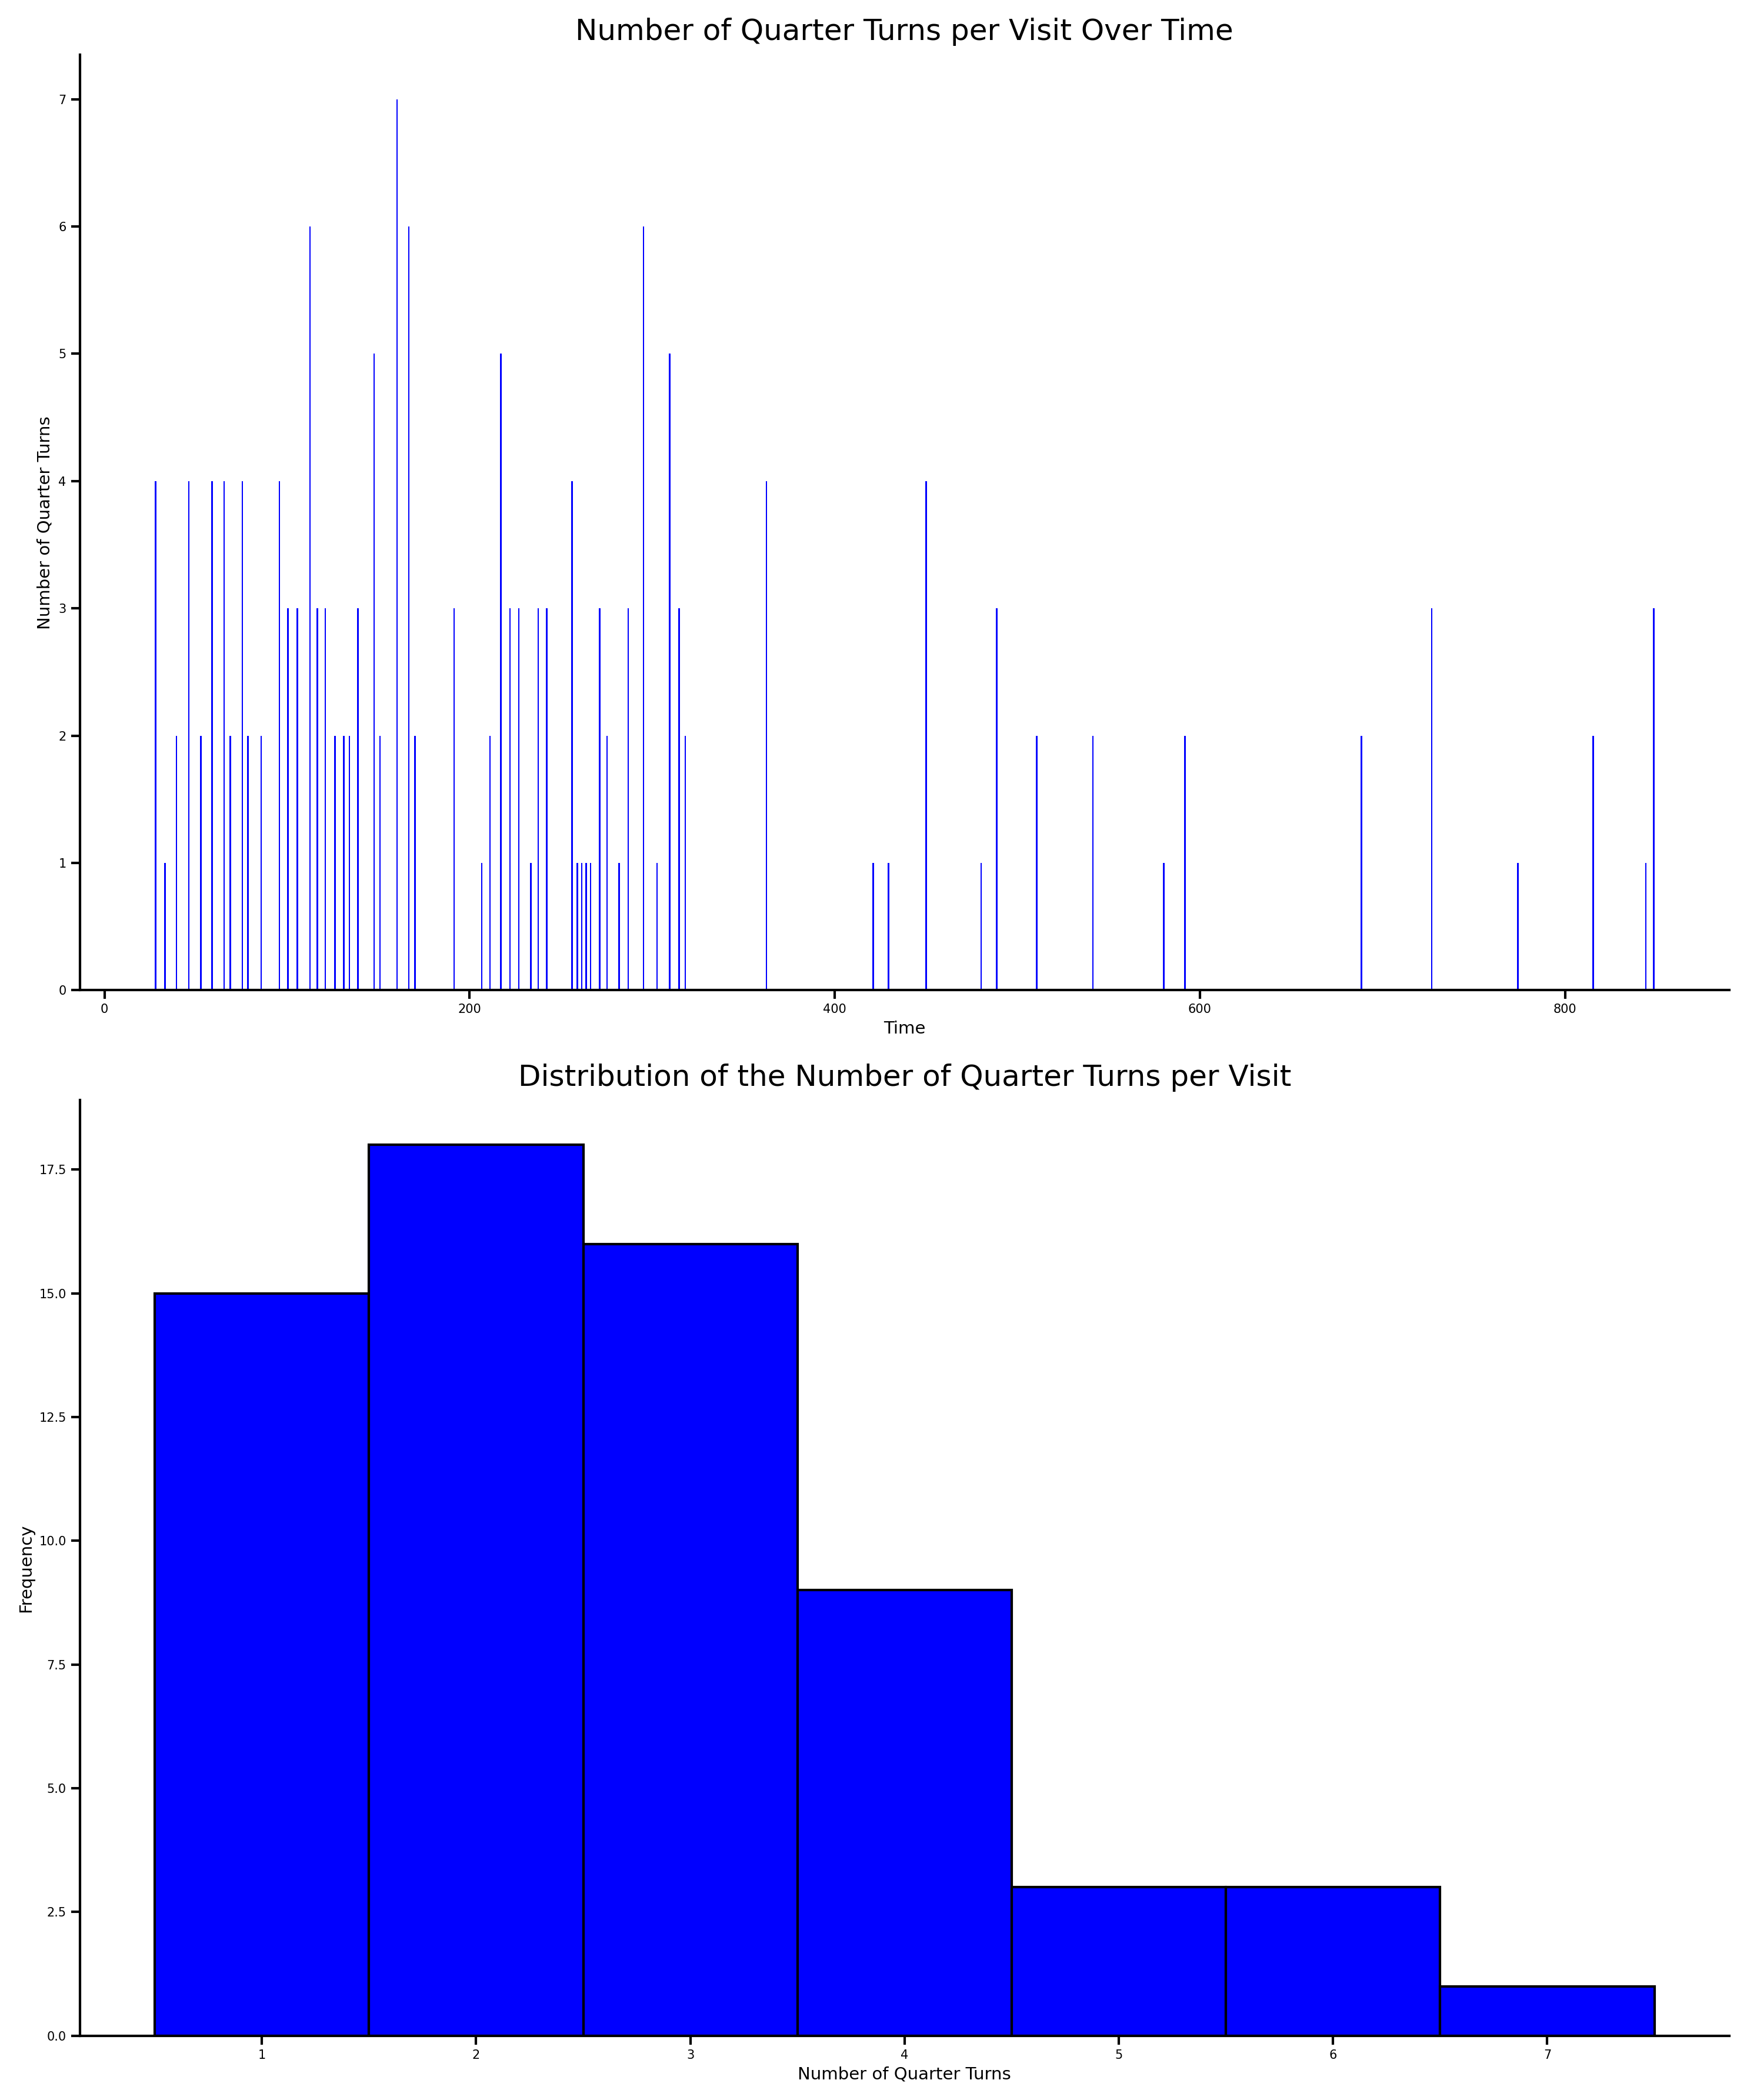

Median number of consecutive quarter turns: 2.0


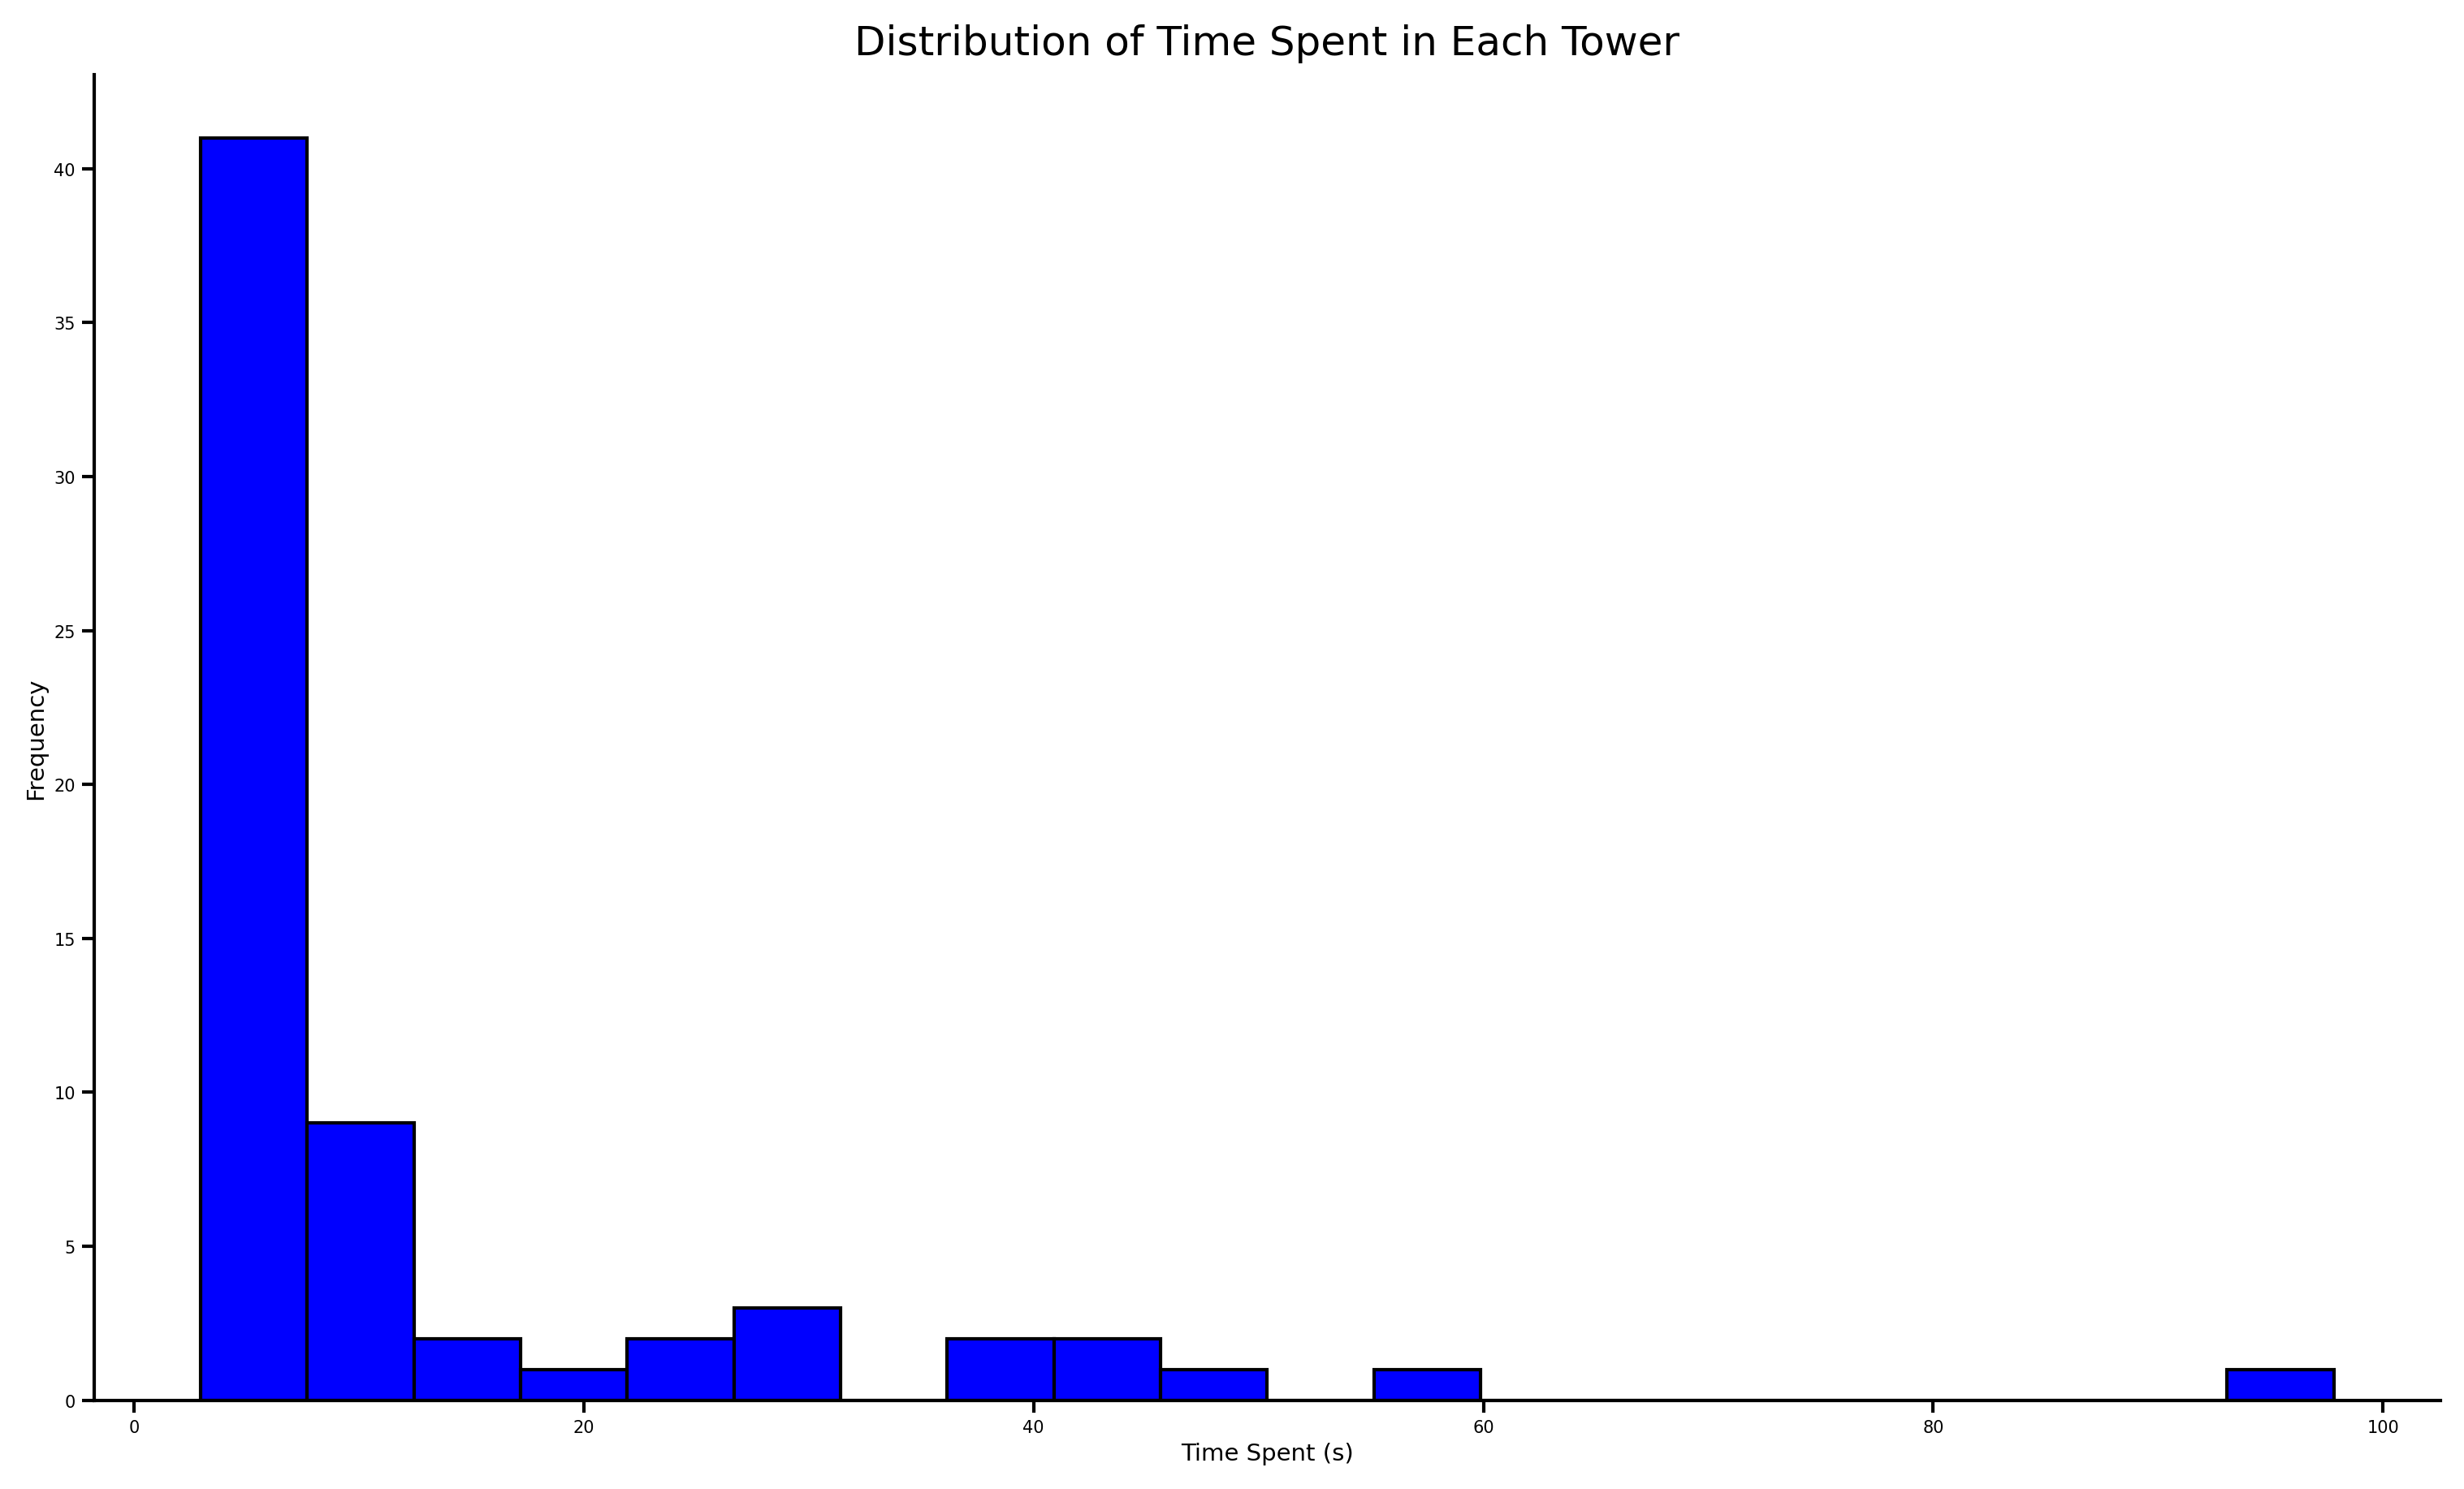

Median time spent in each tower: 7.084000000000003


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute consecutive quarter turns
def compute_consecutive_quarter_turns(traj_df, quarter_turns, turns_df):
    consecutive_quarter_turns = []
    current_tower = None
    count = 0
    start_time = None

    for idx, thisQT in enumerate(quarter_turns):
        start_index, end_index = thisQT[0], thisQT[1]

        if start_index < 0 or end_index >= len(traj_df):
            print(f"Indexes out of bounds for thisQT: {thisQT}")
            continue

        quarter_turn = traj_df.iloc[start_index:end_index + 1]
        
        turns_in_QT = turns_df[(turns_df['time'] >= quarter_turn['time'].iloc[0]) & (turns_df['time'] <= quarter_turn['time'].iloc[-1])]
        
        if not turns_in_QT.empty:
            current_patch = turns_in_QT.iloc[0]['currentPatch']
            if current_patch != current_tower:
                if current_tower is not None:
                    consecutive_quarter_turns.append([start_time, quarter_turn['time'].iloc[-1], current_tower, count])
                current_tower = current_patch
                start_time = quarter_turn['time'].iloc[0]
                count = 1
            else:
                count += 1

    if current_tower is not None:
        consecutive_quarter_turns.append([start_time, quarter_turn['time'].iloc[-1], current_tower, count])

    return consecutive_quarter_turns

# Example usage:
consecutive_quarter_turns = compute_consecutive_quarter_turns(traj_df, quarter_turns, turns_df)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the number of quarter turns per visit over time
end_times = [entry[1] for entry in consecutive_quarter_turns]
num_turns = [entry[3] for entry in consecutive_quarter_turns]
ax1.bar(end_times, num_turns, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Quarter Turns')
ax1.set_title('Number of Quarter Turns per Visit Over Time')

# Plot the distribution of the number of quarter turns performed at each visit
ax2.hist(num_turns, bins=np.arange(1, max(num_turns)+2) - 0.5, edgecolor='black', color='blue')
ax2.set_xlabel('Number of Quarter Turns')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of the Number of Quarter Turns per Visit')

plt.tight_layout()
plt.show()

# Calculate and print the median number of consecutive quarter turns
median_consecutive_turns = np.median(num_turns)
print(f'Median number of consecutive quarter turns: {median_consecutive_turns}')

# Calculate the time spent in each tower
time_spent = [(entry[1] - entry[0]) for entry in consecutive_quarter_turns]

# Plot the distribution of time spent in each tower
plt.figure(figsize=(10, 6))
plt.hist(time_spent, bins=20, edgecolor='black', color='blue')
plt.xlabel('Time Spent (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent in Each Tower')
plt.show()

# Calculate and print the median time spent in each tower
median_time_spent = np.median(time_spent)
print(f'Median time spent in each tower: {median_time_spent}')


In [53]:
import pickle

picklefiletoupload = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/MOU2334/MOU2334_20240620-1516/Pickle_data/consecutive_quarter_turns.pkl'

# Open the pickle file in read-binary mode
with open(picklefiletoupload, 'rb') as file:
    consecutive_quarter_turns = pickle.load(file)

# Print the unpickled data
print(consecutive_quarter_turns)

[[np.float64(15.25), np.float64(15.25), 1], [np.float64(16.211), np.float64(16.211), 1], [np.float64(17.051), np.float64(17.051), 1], [np.float64(17.892), np.float64(17.892), 1], [np.float64(18.813), np.float64(18.813), 1], [np.float64(19.653), np.float64(20.532), 3], [np.float64(22.974), np.float64(22.974), 1], [np.float64(24.653), np.float64(24.653), 1], [np.float64(25.575), np.float64(25.575), 1], [np.float64(26.377), np.float64(26.377), 1], [np.float64(27.095), np.float64(27.095), 1], [np.float64(27.777), np.float64(27.777), 1], [np.float64(29.815), np.float64(29.815), 1], [np.float64(32.259), np.float64(32.259), 1], [np.float64(38.582), np.float64(38.582), 1], [np.float64(40.582), np.float64(40.582), 1], [np.float64(41.464), np.float64(41.464), 1], [np.float64(42.665), np.float64(42.665), 1], [np.float64(43.704), np.float64(43.704), 1], [np.float64(44.745), np.float64(44.745), 1], [np.float64(45.667), np.float64(45.667), 1], [np.float64(46.707), np.float64(46.707), 1], [np.float64

Median number of consecutive quarter turns per visit: 4.5
Median time spent at each tower (in seconds): 9.164999999999992


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_41745/3653886582.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


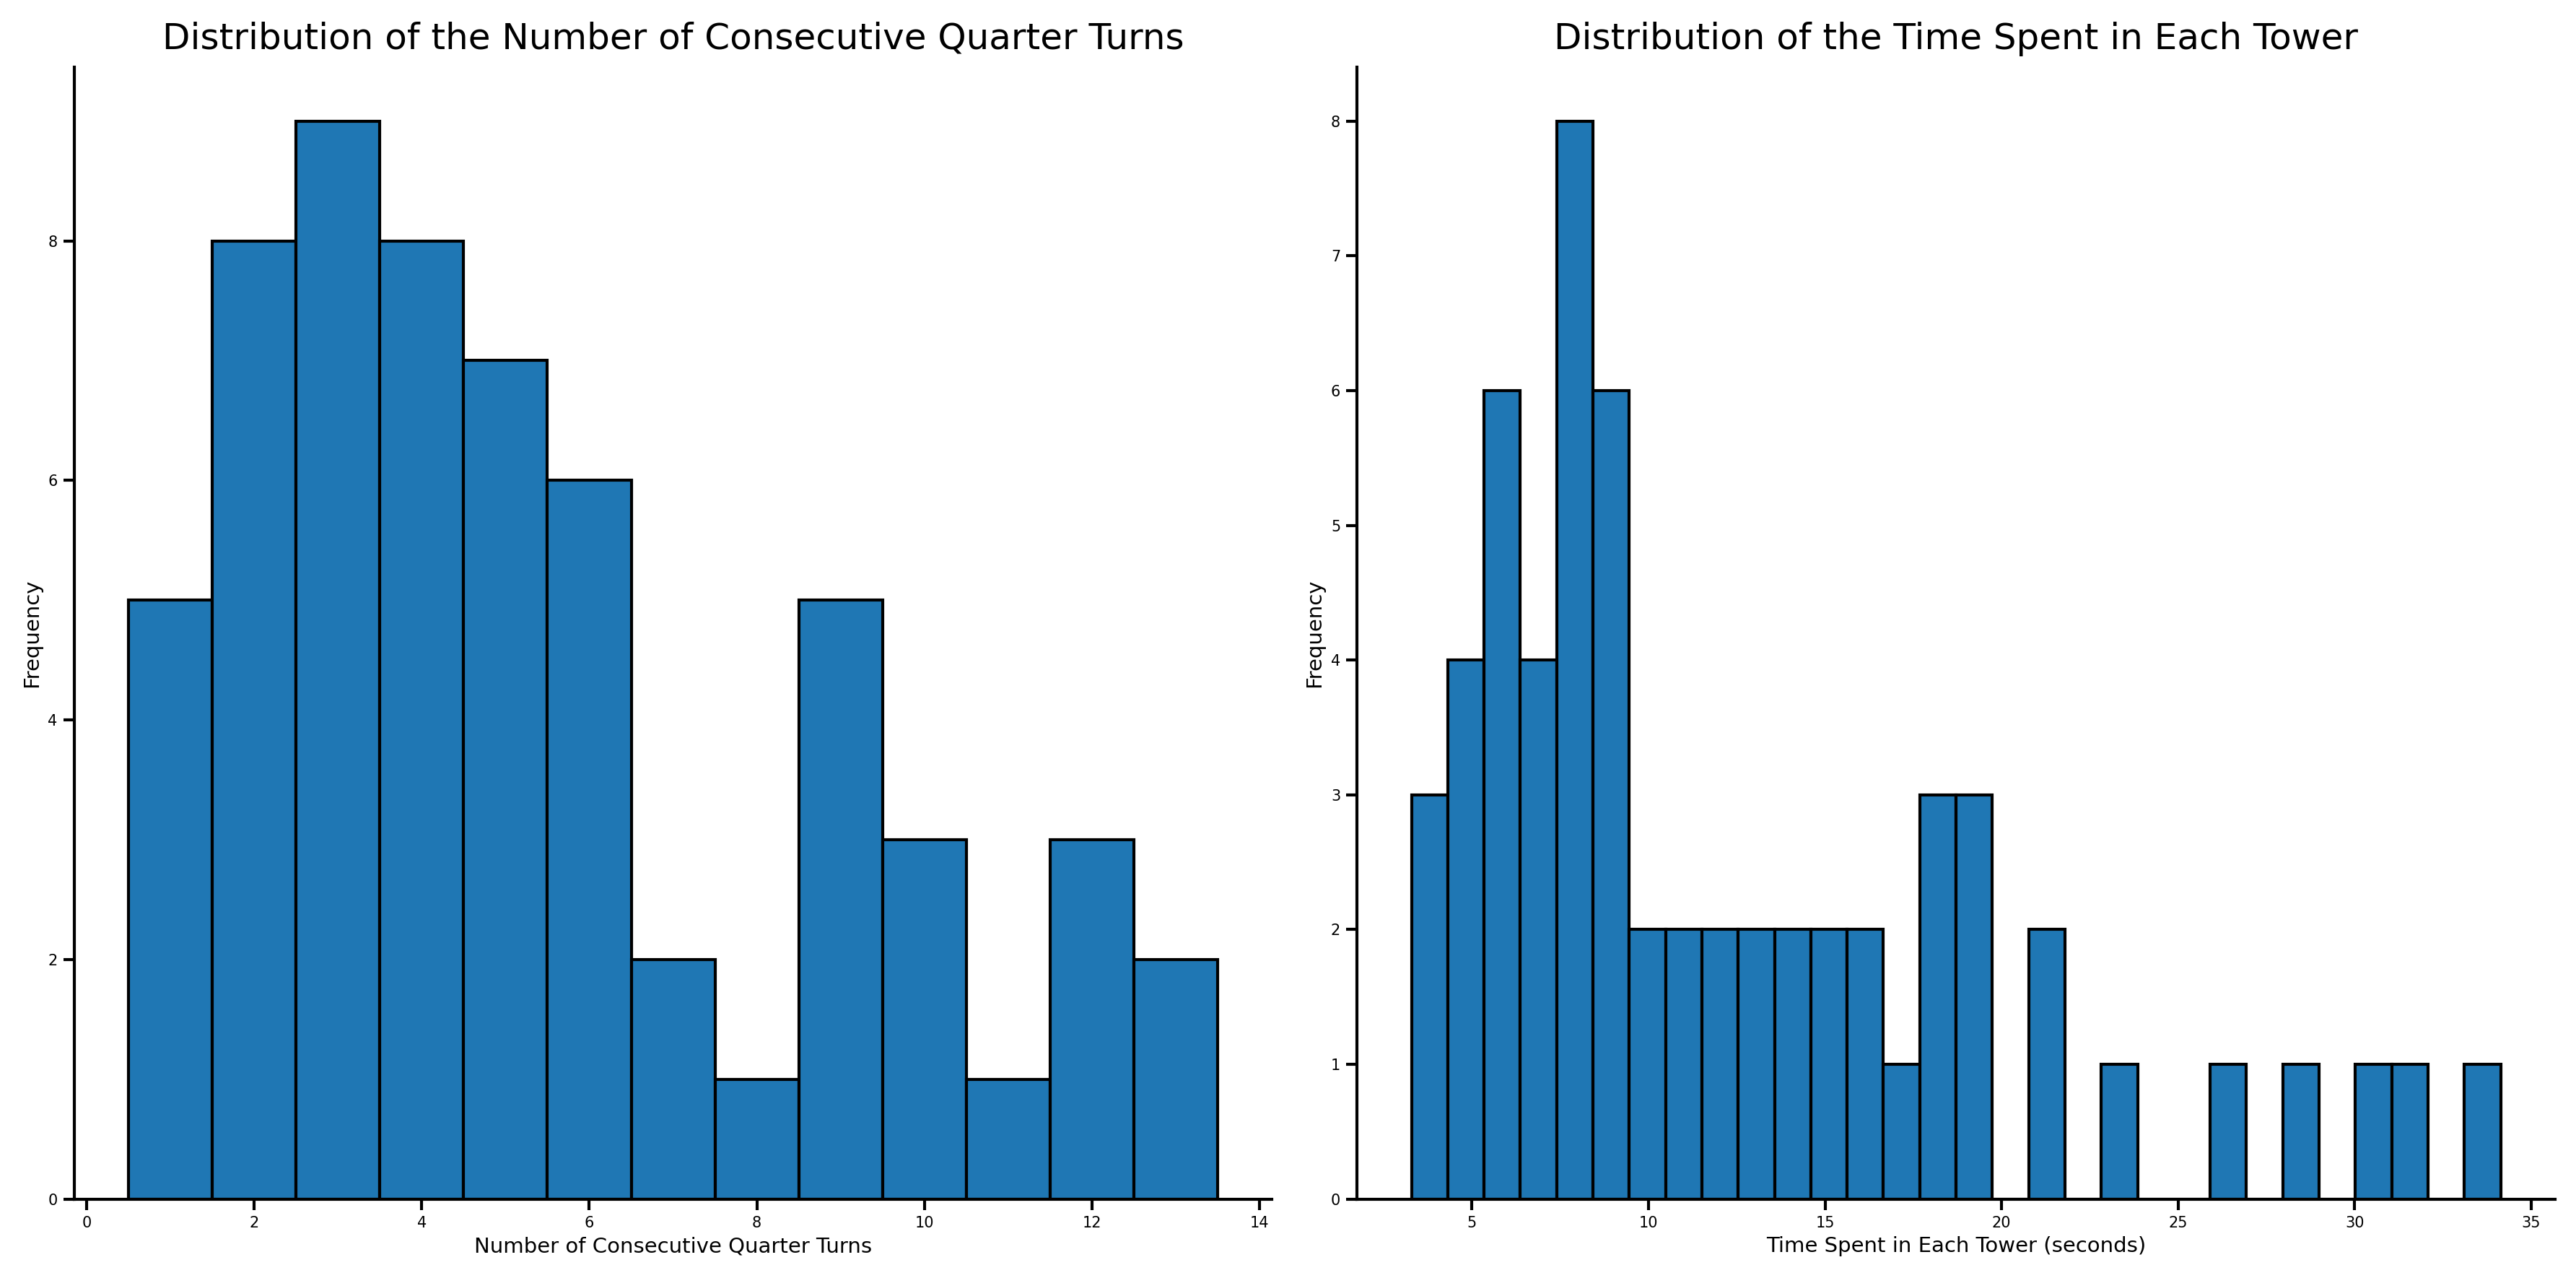

In [62]:
# Extract the number of quarter turns and the time spent for each visit
num_turns = [entry[3] for entry in consecutive_quarter_turns]
time_spent = [entry[1] - entry[0] for entry in consecutive_quarter_turns]

# Calculate the median of the number of quarter turns
median_num_turns = np.median(num_turns)
print("Median number of consecutive quarter turns per visit:", median_num_turns)

# Calculate the median time spent at each tower
median_time_spent = np.median(time_spent)
print("Median time spent at each tower (in seconds):", median_time_spent)

# Plot the distribution of the number of quarter turns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(num_turns, bins=range(1, max(num_turns)+2), align='left', edgecolor='black')
plt.xlabel('Number of Consecutive Quarter Turns')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Consecutive Quarter Turns')

plt.subplot(1, 2, 2)
plt.hist(time_spent, bins=30, edgecolor='black')
plt.xlabel('Time Spent in Each Tower (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of the Time Spent in Each Tower')

plt.tight_layout()
plt.show()

the same analysis is now done in the behavior analysis processing and saved in a pickle file.

In [ ]:
import pickle

picklefiletoupload = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/MOU4175/MOU4175_20230712-1809/Pickle_data/consecutive_quarter_turns.pkl'

# Open the pickle file in read-binary mode
with open(picklefiletoupload, 'rb') as file:
    consecutive_quarter_turns = pickle.load(file)

# Print the unpickled data
print(consecutive_quarter_turns)
